### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Importing Dataset

In [2]:
df = pd.read_csv("/Users/enercent/Desktop/netflix.csv")

In [3]:
df

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                   NaN            NaN   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

              date_added  release_year rating   duration  \
0     September 25, 2021          2020  PG-13     90 min   
1     September 24, 2021          2021  TV-MA  2 Seasons   
2     September 24, 2021          2021  TV-MA   1 Season   
3     September 24, 2021          2021  TV-MA   1 Season   
4     September 24, 2021          2021  TV-MA  2 Seasons   
...                  ...           ...    ...        ...   
8802   November 20, 2019          2007      R    158 min   
8803        July 1, 2019          2018  TV-Y7  2 Seasons   
8804    November 1, 2019          2009      R     88 min   
8805    January 11, 2020          2006     PG     88 min   
8806       March 2, 2019          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  
0     As her father nears the end of his life, filmm...  
1     After crossing paths at a party, a Cape Town t...  
2     To protect his family from a powerful drug lor...  
3     Feuds, flirtations and toilet talk go down amo...  
4     In a city of coaching centers known to train I...  
...                                                 ...  
8802  A political cartoonist, a crime reporter and a...  
8803  While living alone in a spooky town, a young g...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...  

[8807 rows x 12 columns]

### 2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary

### Parsing the column data which are in json format and using split stack re assigning them to the original Dataframe

In [4]:
df.shape

(8807, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.describe()

release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000

In [7]:
df.cast

0                                                     NaN
1       Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2       Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3                                                     NaN
4       Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
                              ...                        
8802    Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...
8803                                                  NaN
8804    Jesse Eisenberg, Woody Harrelson, Emma Stone, ...
8805    Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...
8806    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
Name: cast, Length: 8807, dtype: object

In [8]:
df['cast'][1]

'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng'

In [9]:
const = df["cast"].apply(lambda x : str(x).split(', ')).tolist()

In [10]:
const

[['nan'],
 ['Ama Qamata',
  'Khosi Ngema',
  'Gail Mabalane',
  'Thabang Molaba',
  'Dillon Windvogel',
  'Natasha Thahane',
  'Arno Greeff',
  'Xolile Tshabalala',
  'Getmore Sithole',
  'Cindy Mahlangu',
  'Ryle De Morny',
  'Greteli Fincham',
  'Sello Maake Ka-Ncube',
  'Odwa Gwanya',
  'Mekaila Mathys',
  'Sandi Schultz',
  'Duane Williams',
  'Shamilla Miller',
  'Patrick Mofokeng'],
 ['Sami Bouajila',
  'Tracy Gotoas',
  'Samuel Jouy',
  'Nabiha Akkari',
  'Sofia Lesaffre',
  'Salim Kechiouche',
  'Noureddine Farihi',
  'Geert Van Rampelberg',
  'Bakary Diombera'],
 ['nan'],
 ['Mayur More',
  'Jitendra Kumar',
  'Ranjan Raj',
  'Alam Khan',
  'Ahsaas Channa',
  'Revathi Pillai',
  'Urvi Singh',
  'Arun Kumar'],
 ['Kate Siegel',
  'Zach Gilford',
  'Hamish Linklater',
  'Henry Thomas',
  'Kristin Lehman',
  'Samantha Sloyan',
  'Igby Rigney',
  'Rahul Kohli',
  'Annarah Cymone',
  'Annabeth Gish',
  'Alex Essoe',
  'Rahul Abburi',
  'Matt Biedel',
  'Michael Trucco',
  'Crystal Ba

In [11]:
df_cast = pd.DataFrame(const, index=df["title"])

In [12]:
df_cast

0                1                  2   \
title                                                                        
Dick Johnson Is Dead               nan             None               None   
Blood & Water               Ama Qamata      Khosi Ngema      Gail Mabalane   
Ganglands                Sami Bouajila     Tracy Gotoas        Samuel Jouy   
Jailbirds New Orleans              nan             None               None   
Kota Factory                Mayur More   Jitendra Kumar         Ranjan Raj   
...                                ...              ...                ...   
Zodiac                    Mark Ruffalo  Jake Gyllenhaal  Robert Downey Jr.   
Zombie Dumb                        nan             None               None   
Zombieland             Jesse Eisenberg  Woody Harrelson         Emma Stone   
Zoom                         Tim Allen    Courteney Cox        Chevy Chase   
Zubaan                   Vicky Kaushal  Sarah-Jane Dias    Raaghav Chanana   

                                     3                 4                 5   \
title                                                                         
Dick Johnson Is Dead               None              None              None   
Blood & Water            Thabang Molaba  Dillon Windvogel   Natasha Thahane   
Ganglands                 Nabiha Akkari    Sofia Lesaffre  Salim Kechiouche   
Jailbirds New Orleans              None              None              None   
Kota Factory                  Alam Khan     Ahsaas Channa    Revathi Pillai   
...                                 ...               ...               ...   
Zodiac                  Anthony Edwards         Brian Cox      Elias Koteas   
Zombie Dumb                        None              None              None   
Zombieland              Abigail Breslin       Amber Heard       Bill Murray   
Zoom                          Kate Mara       Ryan Newman   Michael Cassidy   
Zubaan                 Manish Chaudhary      Meghna Malik     Malkeet Rauni   

                                      6                      7   \
title                                                             
Dick Johnson Is Dead                None                   None   
Blood & Water                Arno Greeff      Xolile Tshabalala   
Ganglands              Noureddine Farihi   Geert Van Rampelberg   
Jailbirds New Orleans               None                   None   
Kota Factory                  Urvi Singh             Arun Kumar   
...                                  ...                    ...   
Zodiac                       Donal Logue     John Carroll Lynch   
Zombie Dumb                         None                   None   
Zombieland                    Derek Graf                   None   
Zoom                     Spencer Breslin               Rip Torn   
Zubaan                    Anita Shabdish  Chittaranjan Tripathy   

                                    8               9   ...    40    41    42  \
title                                                   ...                     
Dick Johnson Is Dead              None            None  ...  None  None  None   
Blood & Water          Getmore Sithole  Cindy Mahlangu  ...  None  None  None   
Ganglands              Bakary Diombera            None  ...  None  None  None   
Jailbirds New Orleans             None            None  ...  None  None  None   
Kota Factory                      None            None  ...  None  None  None   
...                                ...             ...  ...   ...   ...   ...   
Zodiac                 Dermot Mulroney   Chloë Sevigny  ...  None  None  None   
Zombie Dumb                       None            None  ...  None  None  None   
Zombieland                        None            None  ...  None  None  None   
Zoom                      Kevin Zegers            None  ...  None  None  None   
Zubaan                            None            None  ...  None  None  None   

                         43    44    45    46    47    48    49  
t

In [13]:
df_cast = df_cast.stack()

In [14]:
df_cast

title                  
Dick Johnson Is Dead  0                      nan
Blood & Water         0               Ama Qamata
                      1              Khosi Ngema
                      2            Gail Mabalane
                      3           Thabang Molaba
                                   ...          
Zubaan                3         Manish Chaudhary
                      4             Meghna Malik
                      5            Malkeet Rauni
                      6           Anita Shabdish
                      7    Chittaranjan Tripathy
Length: 64951, dtype: object

In [15]:
df_cast = df_cast.reset_index()[["title", 0]]

In [16]:
df_cast.columns=["title", "cast"]

In [17]:
df_cast

title                   cast
0      Dick Johnson Is Dead                    nan
1             Blood & Water             Ama Qamata
2             Blood & Water            Khosi Ngema
3             Blood & Water          Gail Mabalane
4             Blood & Water         Thabang Molaba
...                     ...                    ...
64946                Zubaan       Manish Chaudhary
64947                Zubaan           Meghna Malik
64948                Zubaan          Malkeet Rauni
64949                Zubaan         Anita Shabdish
64950                Zubaan  Chittaranjan Tripathy

[64951 rows x 2 columns]

In [18]:
const1 = df["director"].apply(lambda x: str(x).split(', ')).to_list()

In [19]:
const1

[['Kirsten Johnson'],
 ['nan'],
 ['Julien Leclercq'],
 ['nan'],
 ['nan'],
 ['Mike Flanagan'],
 ['Robert Cullen', 'José Luis Ucha'],
 ['Haile Gerima'],
 ['Andy Devonshire'],
 ['Theodore Melfi'],
 ['nan'],
 ['Kongkiat Komesiri'],
 ['Christian Schwochow'],
 ['Bruno Garotti'],
 ['nan'],
 ['nan'],
 ['Pedro de Echave García', 'Pablo Azorín Williams'],
 ['nan'],
 ['Adam Salky'],
 ['nan'],
 ['Olivier Megaton'],
 ['nan'],
 ['K.S. Ravikumar'],
 ['Alex Woo', 'Stanley Moore'],
 ['S. Shankar'],
 ['nan'],
 ['Rajiv Menon'],
 ['Dennis Dugan'],
 ['Scott Stewart'],
 ['Robert Luketic'],
 ['Ashwiny Iyer Tiwari', 'Abhishek Chaubey', 'Saket Chaudhary'],
 ['nan'],
 ['nan'],
 ['nan'],
 ['nan'],
 ['Daniel Sandu'],
 ['Cédric Jimenez'],
 ['nan'],
 ['George Nolfi'],
 ['nan'],
 ['nan'],
 ['Steven Spielberg'],
 ['Jeannot Szwarc'],
 ['Joe Alves'],
 ['Joseph Sargent'],
 ['Tyler Greco'],
 ['Daniel Espinosa'],
 ['Bunmi Ajakaiye'],
 ['Antoine Fuqua'],
 ['nan'],
 ['nan'],
 ['Toshiya Shinohara'],
 ['Toshiya Shinohara'],
 

In [20]:
df_director = pd.DataFrame(const1, index=df["title"])

In [21]:
df_director

0     1     2     3     4     5     6   \
title                                                                        
Dick Johnson Is Dead   Kirsten Johnson  None  None  None  None  None  None   
Blood & Water                      nan  None  None  None  None  None  None   
Ganglands              Julien Leclercq  None  None  None  None  None  None   
Jailbirds New Orleans              nan  None  None  None  None  None  None   
Kota Factory                       nan  None  None  None  None  None  None   
...                                ...   ...   ...   ...   ...   ...   ...   
Zodiac                   David Fincher  None  None  None  None  None  None   
Zombie Dumb                        nan  None  None  None  None  None  None   
Zombieland             Ruben Fleischer  None  None  None  None  None  None   
Zoom                      Peter Hewitt  None  None  None  None  None  None   
Zubaan                     Mozez Singh  None  None  None  None  None  None   

                         7     8     9     10    11    12  
title                                                      
Dick Johnson Is Dead   None  None  None  None  None  None  
Blood & Water          None  None  None  None  None  None  
Ganglands              None  None  None  None  None  None  
Jailbirds New Orleans  None  None  None  None  None  None  
Kota Factory           None  None  None  None  None  None  
...                     ...   ...   ...   ...   ...   ...  
Zodiac                 None  None  None  None  None  None  
Zombie Dumb            None  None  None  None  None  None  
Zombieland             None  None  None  None  None  None  
Zoom                   None  None  None  None  None  None  
Zubaan                 None  None  None  None  None  None  

[8807 rows x 13 columns]

In [22]:
df_director.stack()

title                   
Dick Johnson Is Dead   0    Kirsten Johnson
Blood & Water          0                nan
Ganglands              0    Julien Leclercq
Jailbirds New Orleans  0                nan
Kota Factory           0                nan
                                 ...       
Zodiac                 0      David Fincher
Zombie Dumb            0                nan
Zombieland             0    Ruben Fleischer
Zoom                   0       Peter Hewitt
Zubaan                 0        Mozez Singh
Length: 9612, dtype: object

In [23]:
df_director = pd.DataFrame(df_director.stack())

In [24]:
df_director

0
title                                   
Dick Johnson Is Dead  0  Kirsten Johnson
Blood & Water         0              nan
Ganglands             0  Julien Leclercq
Jailbirds New Orleans 0              nan
Kota Factory          0              nan
...                                  ...
Zodiac                0    David Fincher
Zombie Dumb           0              nan
Zombieland            0  Ruben Fleischer
Zoom                  0     Peter Hewitt
Zubaan                0      Mozez Singh

[9612 rows x 1 columns]

In [25]:
df_director.reset_index(inplace=True)

In [26]:
df_director

title  level_1                0
0      Dick Johnson Is Dead        0  Kirsten Johnson
1             Blood & Water        0              nan
2                 Ganglands        0  Julien Leclercq
3     Jailbirds New Orleans        0              nan
4              Kota Factory        0              nan
...                     ...      ...              ...
9607                 Zodiac        0    David Fincher
9608            Zombie Dumb        0              nan
9609             Zombieland        0  Ruben Fleischer
9610                   Zoom        0     Peter Hewitt
9611                 Zubaan        0      Mozez Singh

[9612 rows x 3 columns]

In [27]:
df_director = df_director[["title",0]]

In [28]:
df_director.columns=["title","director"]

In [29]:
df_director

title         director
0      Dick Johnson Is Dead  Kirsten Johnson
1             Blood & Water              nan
2                 Ganglands  Julien Leclercq
3     Jailbirds New Orleans              nan
4              Kota Factory              nan
...                     ...              ...
9607                 Zodiac    David Fincher
9608            Zombie Dumb              nan
9609             Zombieland  Ruben Fleischer
9610                   Zoom     Peter Hewitt
9611                 Zubaan      Mozez Singh

[9612 rows x 2 columns]

### Merged both cast and director into a single dataframe using title as a common key

In [30]:
df_cast_director = pd.merge(df_cast, df_director, on="title")

In [31]:
df_cast_director

title                   cast         director
0      Dick Johnson Is Dead                    nan  Kirsten Johnson
1             Blood & Water             Ama Qamata              nan
2             Blood & Water            Khosi Ngema              nan
3             Blood & Water          Gail Mabalane              nan
4             Blood & Water         Thabang Molaba              nan
...                     ...                    ...              ...
70807                Zubaan       Manish Chaudhary      Mozez Singh
70808                Zubaan           Meghna Malik      Mozez Singh
70809                Zubaan          Malkeet Rauni      Mozez Singh
70810                Zubaan         Anita Shabdish      Mozez Singh
70811                Zubaan  Chittaranjan Tripathy      Mozez Singh

[70812 rows x 3 columns]

In [32]:
df.head(3)

show_id     type                 title         director  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show         Blood & Water              NaN   
2      s3  TV Show             Ganglands  Julien Leclercq   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...

In [33]:
const2 = df["country"].apply(lambda x: str(x).split(', ')).to_list()

In [34]:
const2

[['United States'],
 ['South Africa'],
 ['nan'],
 ['nan'],
 ['India'],
 ['nan'],
 ['nan'],
 ['United States',
  'Ghana',
  'Burkina Faso',
  'United Kingdom',
  'Germany',
  'Ethiopia'],
 ['United Kingdom'],
 ['United States'],
 ['nan'],
 ['nan'],
 ['Germany', 'Czech Republic'],
 ['nan'],
 ['nan'],
 ['United States'],
 ['nan'],
 ['Mexico'],
 ['nan'],
 ['nan'],
 ['nan'],
 ['Turkey'],
 ['nan'],
 ['nan'],
 ['India'],
 ['Australia'],
 ['nan'],
 ['United States'],
 ['United States'],
 ['United States', 'India', 'France'],
 ['nan'],
 ['nan'],
 ['United Kingdom'],
 ['nan'],
 ['nan'],
 ['nan'],
 ['nan'],
 ['Finland'],
 ['China', 'Canada', 'United States'],
 ['India'],
 ['United States'],
 ['United States'],
 ['United States'],
 ['United States'],
 ['United States'],
 ['nan'],
 ['South Africa', 'United States', 'Japan'],
 ['nan'],
 ['United States'],
 ['Nigeria'],
 ['India'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['United States'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['J

In [35]:
df_country = pd.DataFrame(const2, index=df["title"])

In [36]:
df_country

0     1     2     3     4     5     6   \
title                                                                      
Dick Johnson Is Dead   United States  None  None  None  None  None  None   
Blood & Water           South Africa  None  None  None  None  None  None   
Ganglands                        nan  None  None  None  None  None  None   
Jailbirds New Orleans            nan  None  None  None  None  None  None   
Kota Factory                   India  None  None  None  None  None  None   
...                              ...   ...   ...   ...   ...   ...   ...   
Zodiac                 United States  None  None  None  None  None  None   
Zombie Dumb                      nan  None  None  None  None  None  None   
Zombieland             United States  None  None  None  None  None  None   
Zoom                   United States  None  None  None  None  None  None   
Zubaan                         India  None  None  None  None  None  None   

                         7     8     9     10    11  
title                                                
Dick Johnson Is Dead   None  None  None  None  None  
Blood & Water          None  None  None  None  None  
Ganglands              None  None  None  None  None  
Jailbirds New Orleans  None  None  None  None  None  
Kota Factory           None  None  None  None  None  
...                     ...   ...   ...   ...   ...  
Zodiac                 None  None  None  None  None  
Zombie Dumb            None  None  None  None  None  
Zombieland             None  None  None  None  None  
Zoom                   None  None  None  None  None  
Zubaan                 None  None  None  None  None  

[8807 rows x 12 columns]

In [37]:
df_country = df_country.stack()

In [38]:
df_country = pd.DataFrame(df_country)

In [39]:
df_country.reset_index(inplace=True)

In [40]:
df_country

title  level_1              0
0       Dick Johnson Is Dead        0  United States
1              Blood & Water        0   South Africa
2                  Ganglands        0            nan
3      Jailbirds New Orleans        0            nan
4               Kota Factory        0          India
...                      ...      ...            ...
10840                 Zodiac        0  United States
10841            Zombie Dumb        0            nan
10842             Zombieland        0  United States
10843                   Zoom        0  United States
10844                 Zubaan        0          India

[10845 rows x 3 columns]

In [41]:
df_country = df_country[["title", 0]]

In [42]:
df_country.columns = ["title", "country"]

In [43]:
df_country.head()

title        country
0   Dick Johnson Is Dead  United States
1          Blood & Water   South Africa
2              Ganglands            nan
3  Jailbirds New Orleans            nan
4           Kota Factory          India

In [44]:
const3 = df["listed_in"].apply(lambda x : str(x).split(', ')).to_list()

In [45]:
const3

[['Documentaries'],
 ['International TV Shows', 'TV Dramas', 'TV Mysteries'],
 ['Crime TV Shows', 'International TV Shows', 'TV Action & Adventure'],
 ['Docuseries', 'Reality TV'],
 ['International TV Shows', 'Romantic TV Shows', 'TV Comedies'],
 ['TV Dramas', 'TV Horror', 'TV Mysteries'],
 ['Children & Family Movies'],
 ['Dramas', 'Independent Movies', 'International Movies'],
 ['British TV Shows', 'Reality TV'],
 ['Comedies', 'Dramas'],
 ['Crime TV Shows', 'Docuseries', 'International TV Shows'],
 ['Crime TV Shows', 'International TV Shows', 'TV Action & Adventure'],
 ['Dramas', 'International Movies'],
 ['Children & Family Movies', 'Comedies'],
 ['British TV Shows', 'Crime TV Shows', 'Docuseries'],
 ['TV Comedies', 'TV Dramas'],
 ['Documentaries', 'International Movies'],
 ['Crime TV Shows', 'Spanish-Language TV Shows', 'TV Dramas'],
 ['Thrillers'],
 ['International TV Shows',
  'Spanish-Language TV Shows',
  'TV Action & Adventure'],
 ['Crime TV Shows', 'Docuseries', 'International

In [46]:
df_genre = pd.DataFrame(const3, index=df["title"])

In [47]:
df_genre

0                       1  \
title                                                                     
Dick Johnson Is Dead              Documentaries                    None   
Blood & Water            International TV Shows               TV Dramas   
Ganglands                        Crime TV Shows  International TV Shows   
Jailbirds New Orleans                Docuseries              Reality TV   
Kota Factory             International TV Shows       Romantic TV Shows   
...                                         ...                     ...   
Zodiac                              Cult Movies                  Dramas   
Zombie Dumb                            Kids' TV         Korean TV Shows   
Zombieland                             Comedies           Horror Movies   
Zoom                   Children & Family Movies                Comedies   
Zubaan                                   Dramas    International Movies   

                                           2  
title                                         
Dick Johnson Is Dead                    None  
Blood & Water                   TV Mysteries  
Ganglands              TV Action & Adventure  
Jailbirds New Orleans                   None  
Kota Factory                     TV Comedies  
...                                      ...  
Zodiac                             Thrillers  
Zombie Dumb                      TV Comedies  
Zombieland                              None  
Zoom                                    None  
Zubaan                      Music & Musicals  

[8807 rows x 3 columns]

In [48]:
df_genre = pd.DataFrame(df_genre.stack())

In [49]:
df_genre

0
title                                           
Dick Johnson Is Dead 0             Documentaries
Blood & Water        0    International TV Shows
                     1                 TV Dramas
                     2              TV Mysteries
Ganglands            0            Crime TV Shows
...                                          ...
Zoom                 0  Children & Family Movies
                     1                  Comedies
Zubaan               0                    Dramas
                     1      International Movies
                     2          Music & Musicals

[19323 rows x 1 columns]

In [50]:
df_genre.reset_index(inplace=True)

In [51]:
df_genre=df_genre[["title", 0]]

In [52]:
df_genre.columns = ["title", "genre"]

In [53]:
df_genre

title                     genre
0      Dick Johnson Is Dead             Documentaries
1             Blood & Water    International TV Shows
2             Blood & Water                 TV Dramas
3             Blood & Water              TV Mysteries
4                 Ganglands            Crime TV Shows
...                     ...                       ...
19318                  Zoom  Children & Family Movies
19319                  Zoom                  Comedies
19320                Zubaan                    Dramas
19321                Zubaan      International Movies
19322                Zubaan          Music & Musicals

[19323 rows x 2 columns]

In [54]:
df_country_genre = pd.merge(df_country, df_genre, on="title")

In [55]:
df_country_genre

title        country                     genre
0      Dick Johnson Is Dead  United States             Documentaries
1             Blood & Water   South Africa    International TV Shows
2             Blood & Water   South Africa                 TV Dramas
3             Blood & Water   South Africa              TV Mysteries
4                 Ganglands            nan            Crime TV Shows
...                     ...            ...                       ...
23749                  Zoom  United States  Children & Family Movies
23750                  Zoom  United States                  Comedies
23751                Zubaan          India                    Dramas
23752                Zubaan          India      International Movies
23753                Zubaan          India          Music & Musicals

[23754 rows x 3 columns]

In [56]:
merged_df = pd.merge(df_cast_director, df_country_genre, on="title")

In [57]:
merged_df

title                   cast         director  \
0       Dick Johnson Is Dead                    nan  Kirsten Johnson   
1              Blood & Water             Ama Qamata              nan   
2              Blood & Water             Ama Qamata              nan   
3              Blood & Water             Ama Qamata              nan   
4              Blood & Water            Khosi Ngema              nan   
...                      ...                    ...              ...   
201986                Zubaan         Anita Shabdish      Mozez Singh   
201987                Zubaan         Anita Shabdish      Mozez Singh   
201988                Zubaan  Chittaranjan Tripathy      Mozez Singh   
201989                Zubaan  Chittaranjan Tripathy      Mozez Singh   
201990                Zubaan  Chittaranjan Tripathy      Mozez Singh   

              country                   genre  
0       United States           Documentaries  
1        South Africa  International TV Shows  
2        South Africa               TV Dramas  
3        South Africa            TV Mysteries  
4        South Africa  International TV Shows  
...               ...                     ...  
201986          India    International Movies  
201987          India        Music & Musicals  
201988          India                  Dramas  
201989          India    International Movies  
201990          India        Music & Musicals  

[201991 rows x 5 columns]

In [58]:
df.head(2)

show_id     type                 title         director  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show         Blood & Water              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   

                                         listed_in  \
0                                    Documentaries   
1  International TV Shows, TV Dramas, TV Mysteries   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...

In [59]:
df[["title","date_added","rating", "duration"]].head(3)

title          date_added rating   duration
0  Dick Johnson Is Dead  September 25, 2021  PG-13     90 min
1         Blood & Water  September 24, 2021  TV-MA  2 Seasons
2             Ganglands  September 24, 2021  TV-MA   1 Season

### Final Dataset

In [60]:
df = pd.merge(merged_df,df[["type","title","date_added","rating", "duration", "release_year"]], on="title" )

In [61]:
df

title                   cast         director  \
0       Dick Johnson Is Dead                    nan  Kirsten Johnson   
1              Blood & Water             Ama Qamata              nan   
2              Blood & Water             Ama Qamata              nan   
3              Blood & Water             Ama Qamata              nan   
4              Blood & Water            Khosi Ngema              nan   
...                      ...                    ...              ...   
201986                Zubaan         Anita Shabdish      Mozez Singh   
201987                Zubaan         Anita Shabdish      Mozez Singh   
201988                Zubaan  Chittaranjan Tripathy      Mozez Singh   
201989                Zubaan  Chittaranjan Tripathy      Mozez Singh   
201990                Zubaan  Chittaranjan Tripathy      Mozez Singh   

              country                   genre     type          date_added  \
0       United States           Documentaries    Movie  September 25, 2021   
1        South Africa  International TV Shows  TV Show  September 24, 2021   
2        South Africa               TV Dramas  TV Show  September 24, 2021   
3        South Africa            TV Mysteries  TV Show  September 24, 2021   
4        South Africa  International TV Shows  TV Show  September 24, 2021   
...               ...                     ...      ...                 ...   
201986          India    International Movies    Movie       March 2, 2019   
201987          India        Music & Musicals    Movie       March 2, 2019   
201988          India                  Dramas    Movie       March 2, 2019   
201989          India    International Movies    Movie       March 2, 2019   
201990          India        Music & Musicals    Movie       March 2, 2019   

       rating   duration  release_year  
0       PG-13     90 min          2020  
1       TV-MA  2 Seasons          2021  
2       TV-MA  2 Seasons          2021  
3       TV-MA  2 Seasons          2021  
4       TV-MA  2 Seasons          2021  
...       ...        ...           ...  
201986  TV-14    111 min          2015  
201987  TV-14    111 min          2015  
201988  TV-14    111 min          2015  
201989  TV-14    111 min          2015  
201990  TV-14    111 min          2015  

[201991 rows x 10 columns]

### Missing Value & Outlier check

### Changing null values or nan values as no_actor and no_director

In [62]:
df.loc[df["cast"]=="nan", "cast"]="No_Actor"

In [63]:
df

title                   cast         director  \
0       Dick Johnson Is Dead               No_Actor  Kirsten Johnson   
1              Blood & Water             Ama Qamata              nan   
2              Blood & Water             Ama Qamata              nan   
3              Blood & Water             Ama Qamata              nan   
4              Blood & Water            Khosi Ngema              nan   
...                      ...                    ...              ...   
201986                Zubaan         Anita Shabdish      Mozez Singh   
201987                Zubaan         Anita Shabdish      Mozez Singh   
201988                Zubaan  Chittaranjan Tripathy      Mozez Singh   
201989                Zubaan  Chittaranjan Tripathy      Mozez Singh   
201990                Zubaan  Chittaranjan Tripathy      Mozez Singh   

              country                   genre     type          date_added  \
0       United States           Documentaries    Movie  September 25, 2021   
1        South Africa  International TV Shows  TV Show  September 24, 2021   
2        South Africa               TV Dramas  TV Show  September 24, 2021   
3        South Africa            TV Mysteries  TV Show  September 24, 2021   
4        South Africa  International TV Shows  TV Show  September 24, 2021   
...               ...                     ...      ...                 ...   
201986          India    International Movies    Movie       March 2, 2019   
201987          India        Music & Musicals    Movie       March 2, 2019   
201988          India                  Dramas    Movie       March 2, 2019   
201989          India    International Movies    Movie       March 2, 2019   
201990          India        Music & Musicals    Movie       March 2, 2019   

       rating   duration  release_year  
0       PG-13     90 min          2020  
1       TV-MA  2 Seasons          2021  
2       TV-MA  2 Seasons          2021  
3       TV-MA  2 Seasons          2021  
4       TV-MA  2 Seasons          2021  
...       ...        ...           ...  
201986  TV-14    111 min          2015  
201987  TV-14    111 min          2015  
201988  TV-14    111 min          2015  
201989  TV-14    111 min          2015  
201990  TV-14    111 min          2015  

[201991 rows x 10 columns]

In [64]:
df.loc[df["director"]=="nan", "director"]="No_Director"

In [65]:
df.head()

title         cast         director        country  \
0  Dick Johnson Is Dead     No_Actor  Kirsten Johnson  United States   
1         Blood & Water   Ama Qamata      No_Director   South Africa   
2         Blood & Water   Ama Qamata      No_Director   South Africa   
3         Blood & Water   Ama Qamata      No_Director   South Africa   
4         Blood & Water  Khosi Ngema      No_Director   South Africa   

                    genre     type          date_added rating   duration  \
0           Documentaries    Movie  September 25, 2021  PG-13     90 min   
1  International TV Shows  TV Show  September 24, 2021  TV-MA  2 Seasons   
2               TV Dramas  TV Show  September 24, 2021  TV-MA  2 Seasons   
3            TV Mysteries  TV Show  September 24, 2021  TV-MA  2 Seasons   
4  International TV Shows  TV Show  September 24, 2021  TV-MA  2 Seasons   

   release_year  
0          2020  
1          2021  
2          2021  
3          2021  
4          2021

In [66]:
df["duration"] = df.duration.str.split().str[0]

In [67]:
df.head(3)

title        cast         director        country  \
0  Dick Johnson Is Dead    No_Actor  Kirsten Johnson  United States   
1         Blood & Water  Ama Qamata      No_Director   South Africa   
2         Blood & Water  Ama Qamata      No_Director   South Africa   

                    genre     type          date_added rating duration  \
0           Documentaries    Movie  September 25, 2021  PG-13       90   
1  International TV Shows  TV Show  September 24, 2021  TV-MA        2   
2               TV Dramas  TV Show  September 24, 2021  TV-MA        2   

   release_year  
0          2020  
1          2021  
2          2021

In [68]:
df.duration.dtypes

dtype('O')

In [69]:
df.duration.isnull().sum()

3

In [70]:
df["duration"].fillna(0).isnull().sum()

0

In [71]:
df["duration"] = df["duration"].fillna(0)

In [72]:
df["duration"] = df["duration"].astype(int)

In [73]:
df.head(2)

title        cast         director        country  \
0  Dick Johnson Is Dead    No_Actor  Kirsten Johnson  United States   
1         Blood & Water  Ama Qamata      No_Director   South Africa   

                    genre     type          date_added rating  duration  \
0           Documentaries    Movie  September 25, 2021  PG-13        90   
1  International TV Shows  TV Show  September 24, 2021  TV-MA         2   

   release_year  
0          2020  
1          2021

In [74]:
df.isna().sum()

title             0
cast              0
director          0
country           0
genre             0
type              0
date_added      158
rating           67
duration          0
release_year      0
dtype: int64

In [75]:
df["date_added"] = pd.to_datetime(df["date_added"])

In [76]:
df.head(2)

title        cast         director        country  \
0  Dick Johnson Is Dead    No_Actor  Kirsten Johnson  United States   
1         Blood & Water  Ama Qamata      No_Director   South Africa   

                    genre     type date_added rating  duration  release_year  
0           Documentaries    Movie 2021-09-25  PG-13        90          2020  
1  International TV Shows  TV Show 2021-09-24  TV-MA         2          2021

In [77]:
df.shape

(201991, 10)

In [78]:
df["duration"].mean()

77.6876395482967

In [79]:
df["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

In [80]:
df.loc[df["type"]==df["type"].unique()[0]]["duration"].mean()

106.85425423229088

In [81]:
df.loc[df["type"]==df["type"].unique()[1]]["duration"].mean()

1.9281007337750231

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201991 entries, 0 to 201990
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   title         201991 non-null  object        
 1   cast          201991 non-null  object        
 2   director      201991 non-null  object        
 3   country       201991 non-null  object        
 4   genre         201991 non-null  object        
 5   type          201991 non-null  object        
 6   date_added    201833 non-null  datetime64[ns]
 7   rating        201924 non-null  object        
 8   duration      201991 non-null  int64         
 9   release_year  201991 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 17.0+ MB


In [83]:
df[df["cast"]=="No_Actor"]

title      cast         director  \
0                      Dick Johnson Is Dead  No_Actor  Kirsten Johnson   
85                    Jailbirds New Orleans  No_Actor      No_Director   
86                    Jailbirds New Orleans  No_Actor      No_Director   
353     Vendetta: Truth, Lies and The Mafia  No_Actor      No_Director   
354     Vendetta: Truth, Lies and The Mafia  No_Actor      No_Director   
...                                     ...       ...              ...   
200705                            Woodstock  No_Actor    Barak Goodman   
200824      WWII: Report from the Aleutians  No_Actor      John Huston   
201932                          Zombie Dumb  No_Actor      No_Director   
201933                          Zombie Dumb  No_Actor      No_Director   
201934                          Zombie Dumb  No_Actor      No_Director   

              country             genre     type date_added rating  duration  \
0       United States     Documentaries    Movie 2021-09-25  PG-13        90   
85                nan        Docuseries  TV Show 2021-09-24  TV-MA         1   
86                nan        Reality TV  TV Show 2021-09-24  TV-MA         1   
353               nan    Crime TV Shows  TV Show 2021-09-24  TV-MA         1   
354               nan        Docuseries  TV Show 2021-09-24  TV-MA         1   
...               ...               ...      ...        ...    ...       ...   
200705  United States  Music & Musicals    Movie 2019-08-13  TV-MA        97   
200824  United States     Documentaries    Movie 2017-03-31  TV-PG        45   
201932            nan          Kids' TV  TV Show 2019-07-01  TV-Y7         2   
201933            nan   Korean TV Shows  TV Show 2019-07-01  TV-Y7         2   
201934            nan       TV Comedies  TV Show 2019-07-01  TV-Y7         2   

        release_year  
0               2020  
85              2021  
86              2021  
353             2021  
354             2021  
...              ...  
200705          2019  
200824          1943  
201932          2018  
201933          2018  
201934          2018  

[2146 rows x 10 columns]

In [84]:
len(df)

201991

In [85]:
df[df["cast"]=="No_Actor"].groupby("type")["title"].count()

type
Movie      1328
TV Show     818
Name: title, dtype: int64

### It can be seen that out of all the null values in the table for the field cast 818 belong to TV show and 1328 belong to Movie

In [86]:
df["cast"].mode()

0    No_Actor
Name: cast, dtype: object

In [87]:
df["cast"].value_counts()

No_Actor          2146
Liam Neeson        161
Alfred Molina      160
John Krasinski     139
Salma Hayek        130
                  ... 
Dario Yazbek         1
Corinne Foxx         1
Jacob Craner         1
Laila Berzins        1
Richard Ryan         1
Name: cast, Length: 36440, dtype: int64

In [88]:
df[df["cast"]!="No_Actor"]["cast"].value_counts()

Liam Neeson             161
Alfred Molina           160
John Krasinski          139
Salma Hayek             130
Frank Langella          128
                       ... 
Doug Averill              1
Lance Lewman              1
Ashleigh Aston Moore      1
Nanao                     1
Emily Rios                1
Name: cast, Length: 36439, dtype: int64

In [89]:
df.columns

Index(['title', 'cast', 'director', 'country', 'genre', 'type', 'date_added',
       'rating', 'duration', 'release_year'],
      dtype='object')

In [90]:
df["date_added"].mean()

Timestamp('2019-06-19 10:42:47.568237312')

In [91]:
df["date_added"].isnull().sum()

158

### there are 158 nulls in the date_added column and we can replace it by the mean as it won't make much of a difference

In [92]:
df["date_added"] = df["date_added"].fillna(df["date_added"].mean())

In [93]:
df["date_added"].isnull().sum()

0

In [94]:
df.isnull().sum()

title            0
cast             0
director         0
country          0
genre            0
type             0
date_added       0
rating          67
duration         0
release_year     0
dtype: int64

### Filling the missing values for the rating column as mode of the rating column or field as we can observe that most frequent rating is TV-MA and also by the titles of most of our data in the dataframe with missing rating looks like adult series or movies

In [95]:
df.loc[df["rating"].isnull()].head(10)

title             cast  \
135125  13TH: A Conversation with Oprah Winfrey & Ava ...    Oprah Winfrey   
135126  13TH: A Conversation with Oprah Winfrey & Ava ...     Ava DuVernay   
154377                  Gargantia on the Verdurous Planet   Kaito Ishikawa   
154378                  Gargantia on the Verdurous Planet   Kaito Ishikawa   
154379                  Gargantia on the Verdurous Planet  Hisako Kanemoto   
154380                  Gargantia on the Verdurous Planet  Hisako Kanemoto   
154381                  Gargantia on the Verdurous Planet        Ai Kayano   
154382                  Gargantia on the Verdurous Planet        Ai Kayano   
154383                  Gargantia on the Verdurous Planet       Kana Asumi   
154384                  Gargantia on the Verdurous Planet       Kana Asumi   

           director country                   genre     type date_added  \
135125  No_Director     nan                  Movies    Movie 2017-01-26   
135126  No_Director     nan                  Movies    Movie 2017-01-26   
154377  No_Director   Japan            Anime Series  TV Show 2016-12-01   
154378  No_Director   Japan  International TV Shows  TV Show 2016-12-01   
154379  No_Director   Japan            Anime Series  TV Show 2016-12-01   
154380  No_Director   Japan  International TV Shows  TV Show 2016-12-01   
154381  No_Director   Japan            Anime Series  TV Show 2016-12-01   
154382  No_Director   Japan  International TV Shows  TV Show 2016-12-01   
154383  No_Director   Japan            Anime Series  TV Show 2016-12-01   
154384  No_Director   Japan  International TV Shows  TV Show 2016-12-01   

       rating  duration  release_year  
135125    NaN        37          2017  
135126    NaN        37          2017  
154377    NaN         1          2013  
154378    NaN         1          2013  
154379    NaN         1          2013  
154380    NaN         1          2013  
154381    NaN         1          2013  
154382    NaN         1          2013  
154383    NaN         1          2013  
154384    NaN         1          2013

In [96]:
df["rating"].mode()

0    TV-MA
Name: rating, dtype: object

In [97]:
df["rating"] = df["rating"].fillna(df['rating'].mode()[0])

In [98]:
df.isnull().sum()

title           0
cast            0
director        0
country         0
genre           0
type            0
date_added      0
rating          0
duration        0
release_year    0
dtype: int64

In [99]:
df["type"]

0           Movie
1         TV Show
2         TV Show
3         TV Show
4         TV Show
           ...   
201986      Movie
201987      Movie
201988      Movie
201989      Movie
201990      Movie
Name: type, Length: 201991, dtype: object

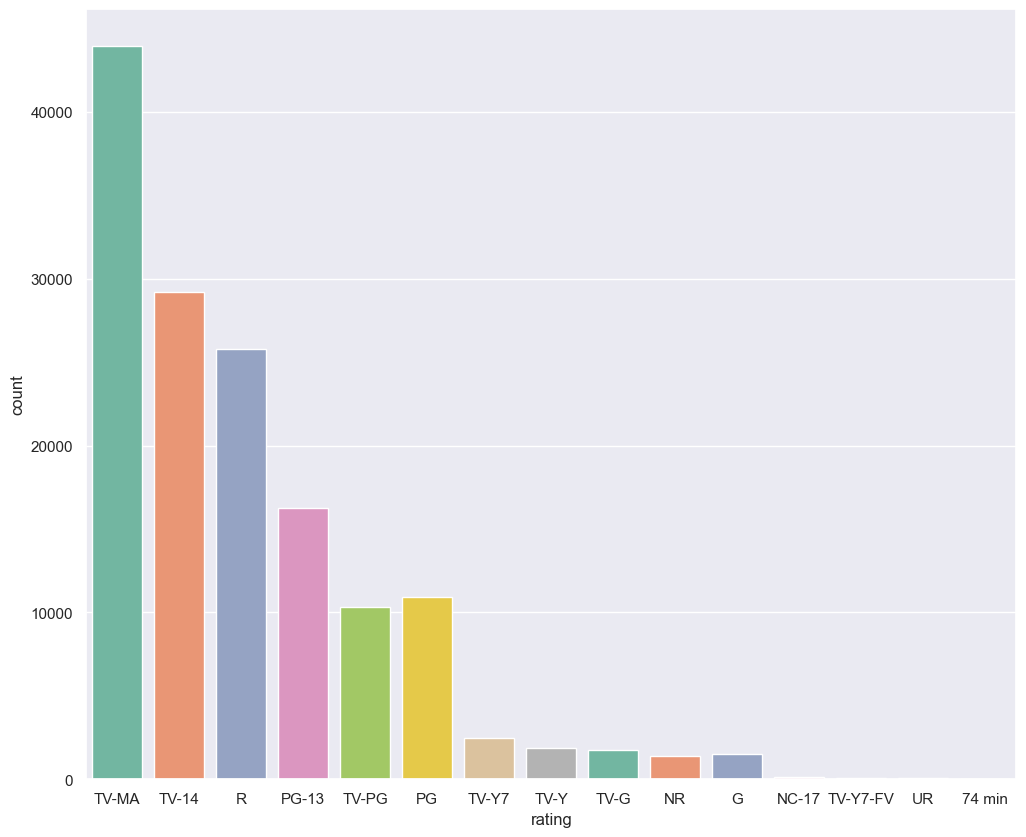

In [100]:
plt.figure(figsize=(12,10))
sns.set(style='darkgrid')
ax = sns.countplot(x='rating', data=df[df["type"]=="Movie"], palette='Set2', order=df['rating'].value_counts().index[0:15])

In [101]:
df['rating'].value_counts()

TV-MA       73934
TV-14       43931
R           25860
PG-13       16246
TV-PG       14926
PG          10919
TV-Y7        6304
TV-Y         3665
TV-G         2779
NR           1573
G            1530
NC-17         149
TV-Y7-FV       86
UR             86
74 min          1
84 min          1
66 min          1
Name: rating, dtype: int64

In [102]:
movie_rating = df['rating'].value_counts()[['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']]

In [103]:
movie_rating

G            1530
TV-Y         3665
TV-G         2779
PG          10919
TV-Y7        6304
TV-Y7-FV       86
TV-PG       14926
PG-13       16246
TV-14       43931
R           25860
NC-17         149
TV-MA       73934
Name: rating, dtype: int64

In [104]:
def rating_barplot(data, title, height, h_lim=50000):
    fig, ax = plt.subplots(1,1, figsize=(18, 8), dpi=200)
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data,  color="#e0e0e0", width=0.52, edgecolor='black')

    color =  ['green',  'blue',  'orange',  'red']
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.07)
    ax.set_title(f'Distribution of {title} Rating (After)', fontsize=15, fontweight='bold', position=(0.20, 1.0+0.03))
    plt.show()
    

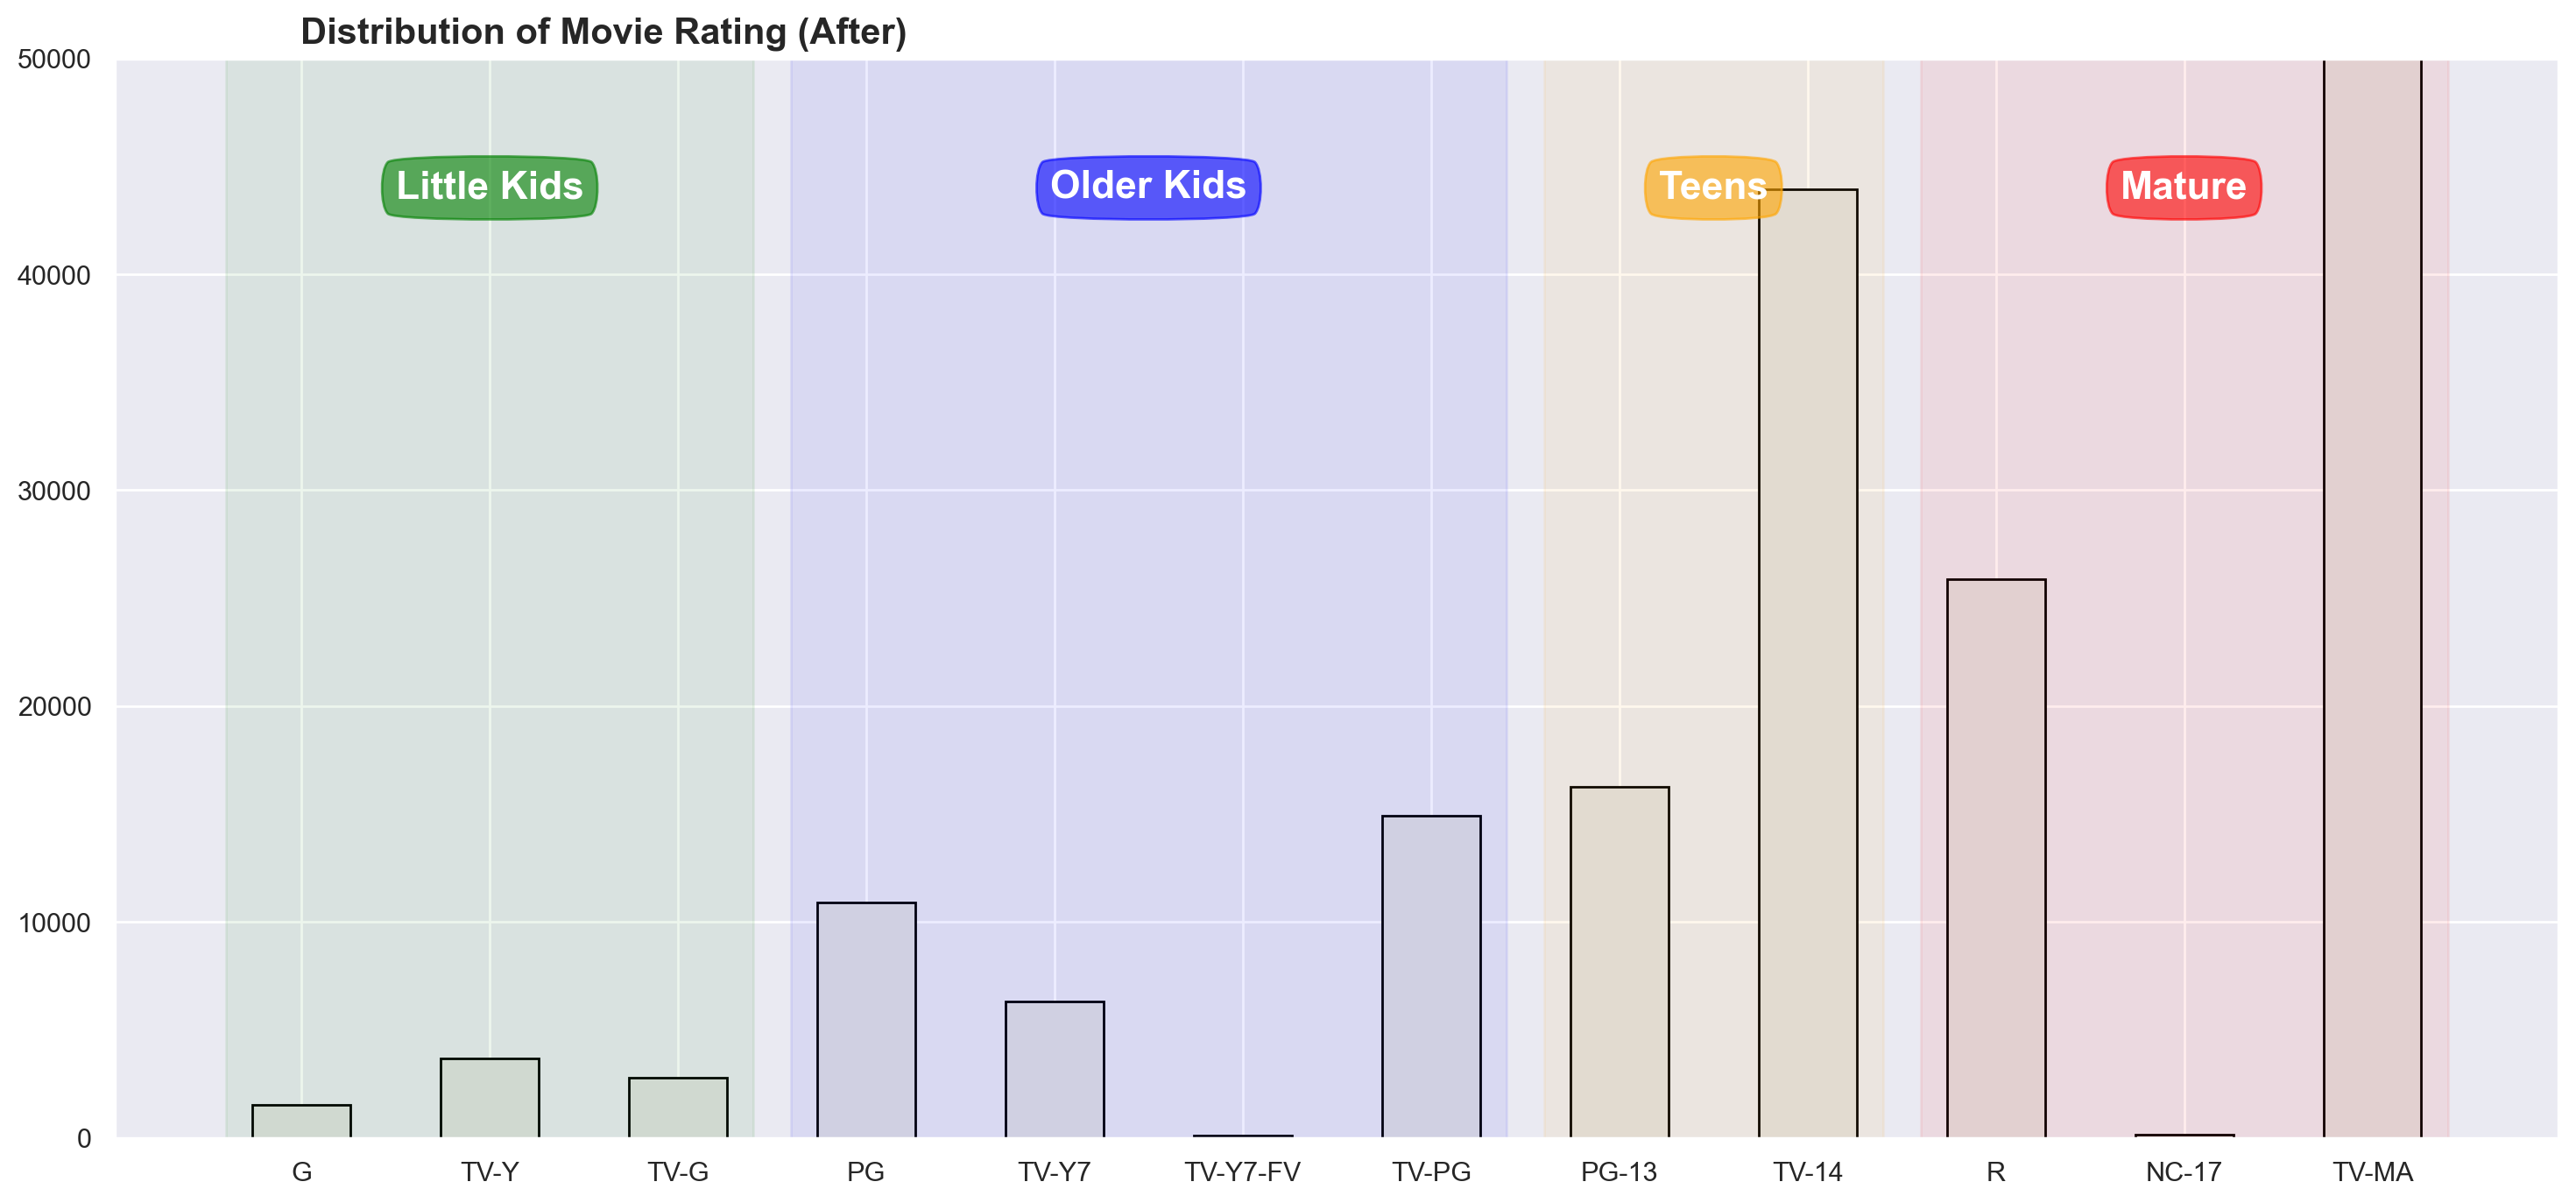

In [105]:
rating_barplot(movie_rating,'Movie', 44000, 50000)

In [106]:
df["country"].value_counts()

United States     59349
India             22814
United Kingdom    12945
nan               11897
Japan              8679
                  ...  
Palestine             2
Kazakhstan            1
Nicaragua             1
United States,        1
Uganda                1
Name: country, Length: 128, dtype: int64

In [107]:
df.head(20)

title              cast         director        country  \
0   Dick Johnson Is Dead          No_Actor  Kirsten Johnson  United States   
1          Blood & Water        Ama Qamata      No_Director   South Africa   
2          Blood & Water        Ama Qamata      No_Director   South Africa   
3          Blood & Water        Ama Qamata      No_Director   South Africa   
4          Blood & Water       Khosi Ngema      No_Director   South Africa   
5          Blood & Water       Khosi Ngema      No_Director   South Africa   
6          Blood & Water       Khosi Ngema      No_Director   South Africa   
7          Blood & Water     Gail Mabalane      No_Director   South Africa   
8          Blood & Water     Gail Mabalane      No_Director   South Africa   
9          Blood & Water     Gail Mabalane      No_Director   South Africa   
10         Blood & Water    Thabang Molaba      No_Director   South Africa   
11         Blood & Water    Thabang Molaba      No_Director   South Africa   
12         Blood & Water    Thabang Molaba      No_Director   South Africa   
13         Blood & Water  Dillon Windvogel      No_Director   South Africa   
14         Blood & Water  Dillon Windvogel      No_Director   South Africa   
15         Blood & Water  Dillon Windvogel      No_Director   South Africa   
16         Blood & Water   Natasha Thahane      No_Director   South Africa   
17         Blood & Water   Natasha Thahane      No_Director   South Africa   
18         Blood & Water   Natasha Thahane      No_Director   South Africa   
19         Blood & Water       Arno Greeff      No_Director   South Africa   

                     genre     type date_added rating  duration  release_year  
0            Documentaries    Movie 2021-09-25  PG-13        90          2020  
1   International TV Shows  TV Show 2021-09-24  TV-MA         2          2021  
2                TV Dramas  TV Show 2021-09-24  TV-MA         2          2021  
3             TV Mysteries  TV Show 2021-09-24  TV-MA         2          2021  
4   International TV Shows  TV Show 2021-09-24  TV-MA         2          2021  
5                TV Dramas  TV Show 2021-09-24  TV-MA         2          2021  
6             TV Mysteries  TV Show 2021-09-24  TV-MA         2          2021  
7   International TV Shows  TV Show 2021-09-24  TV-MA         2          2021  
8                TV Dramas  TV Show 2021-09-24  TV-MA         2          2021  
9             TV Mysteries  TV Show 2021-09-24  TV-MA         2          2021  
10  International TV Shows  TV Show 2021-09-24  TV-MA         2          2021  
11               TV Dramas  TV Show 2021-09-24  TV-MA         2          2021  
12            TV Mysteries  TV Show 2021-09-24  TV-MA         2          2021  
13  International TV Shows  TV Show 2021-09-24  TV-MA         2          2021  
14               TV Dramas  TV Show 2021-09-24  TV-MA         2          2021  
15            TV Mysteries  TV Show 2021-09-24  TV-MA         2          2021  
16  International TV Shows  TV Show 2021-09-24  TV-MA         2          2021  
17               TV Dramas  TV Show 2021-09-24  TV-MA         2          2021  
18            TV Mysteries  TV Show 2021-09-24  TV-MA         2          2021  
19  International TV Shows  TV Show 2021-09-24  TV-MA         2          2021

In [108]:
df.loc[df["country"]=="nan","country"] = "No_country"

In [109]:
df[df["type"]=="TV Show"].drop_duplicates(subset='title')["country"].value_counts()

United States           847
No_country              391
United Kingdom          246
Japan                   174
South Korea             164
Canada                   84
India                    81
Taiwan                   70
France                   64
Australia                56
Spain                    52
Mexico                   48
China                    41
Turkey                   30
Brazil                   28
Colombia                 25
Germany                  25
Thailand                 24
Argentina                20
Italy                    19
Singapore                18
Russia                   14
Egypt                    14
Denmark                  11
Israel                   10
Norway                    9
Belgium                   9
Nigeria                   9
Poland                    8
Sweden                    8
Malaysia                  7
Lebanon                   6
South Africa              6
Ireland                   6
Netherlands               5
Chile               

In [110]:
df["type"].value_counts()

Movie      145843
TV Show     56148
Name: type, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='duration'>

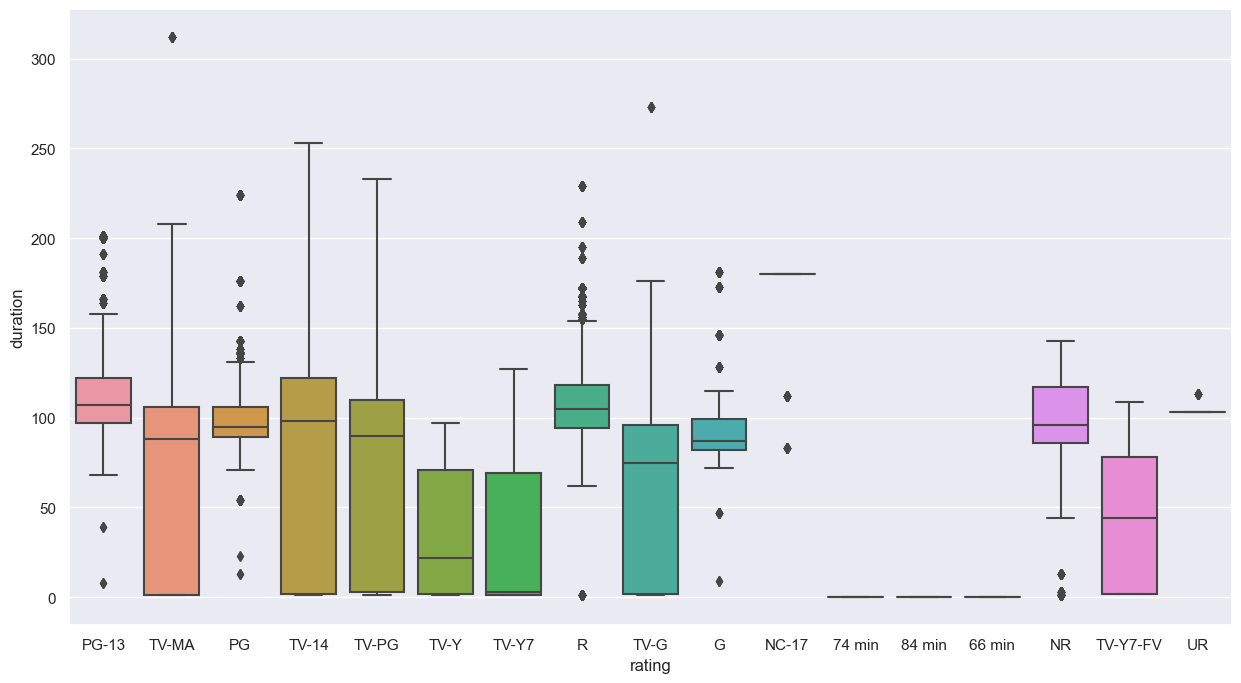

In [111]:
plt.figure(figsize=(15,8))
sns.boxplot(x = df['rating'], y = df['duration'])

In [112]:
df.loc[(df["rating"]=="74 min")|(df["rating"]=="84 min")|(df["rating"]=="66 min")]

title        cast    director  \
126537                       Louis C.K. 2017  Louis C.K.  Louis C.K.   
131603                 Louis C.K.: Hilarious  Louis C.K.  Louis C.K.   
131737  Louis C.K.: Live at the Comedy Store  Louis C.K.  Louis C.K.   

              country   genre   type date_added  rating  duration  \
126537  United States  Movies  Movie 2017-04-04  74 min         0   
131603  United States  Movies  Movie 2016-09-16  84 min         0   
131737  United States  Movies  Movie 2016-08-15  66 min         0   

        release_year  
126537          2017  
131603          2010  
131737          2015

In [113]:
df.loc[df["duration"]==0]

title        cast    director  \
126537                       Louis C.K. 2017  Louis C.K.  Louis C.K.   
131603                 Louis C.K.: Hilarious  Louis C.K.  Louis C.K.   
131737  Louis C.K.: Live at the Comedy Store  Louis C.K.  Louis C.K.   

              country   genre   type date_added  rating  duration  \
126537  United States  Movies  Movie 2017-04-04  74 min         0   
131603  United States  Movies  Movie 2016-09-16  84 min         0   
131737  United States  Movies  Movie 2016-08-15  66 min         0   

        release_year  
126537          2017  
131603          2010  
131737          2015

### We can see that the three movies duration are in rating and have no rating

In [114]:
df.loc[(df["rating"]=="74 min")|(df["rating"]=="84 min")|(df["rating"]=="66 min"), "duration"] = df.loc[(df["rating"]=="74 min")|(df["rating"]=="84 min")|(df["rating"]=="66 min"), "rating"].str.extract('(\d+)')[0]

In [115]:
df.loc[(df["cast"]=="Louis C.K.")&(df["director"]=="Louis C.K.")]

title        cast    director  \
126537                       Louis C.K. 2017  Louis C.K.  Louis C.K.   
131603                 Louis C.K.: Hilarious  Louis C.K.  Louis C.K.   
131737  Louis C.K.: Live at the Comedy Store  Louis C.K.  Louis C.K.   

              country   genre   type date_added  rating duration  release_year  
126537  United States  Movies  Movie 2017-04-04  74 min       74          2017  
131603  United States  Movies  Movie 2016-09-16  84 min       84          2010  
131737  United States  Movies  Movie 2016-08-15  66 min       66          2015

### Now need to replace the rating of these rows by the most frequent rating 

In [116]:
df.loc[(df["cast"]=="Louis C.K.")&(df["director"]=="Louis C.K."), "rating"] = df["rating"].mode()[0]

In [117]:
df.loc[(df["cast"]=="Louis C.K.")&(df["director"]=="Louis C.K."), "rating"]

126537    TV-MA
131603    TV-MA
131737    TV-MA
Name: rating, dtype: object

In [118]:
df.loc[(df["cast"]=="Louis C.K.")&(df["director"]=="Louis C.K."), "duration"] = df.loc[(df["cast"]=="Louis C.K.")&(df["director"]=="Louis C.K."), "duration"].astype(int)

### Now the data is clean as we got rid of all the missing values and outliers

<AxesSubplot:xlabel='rating', ylabel='duration'>

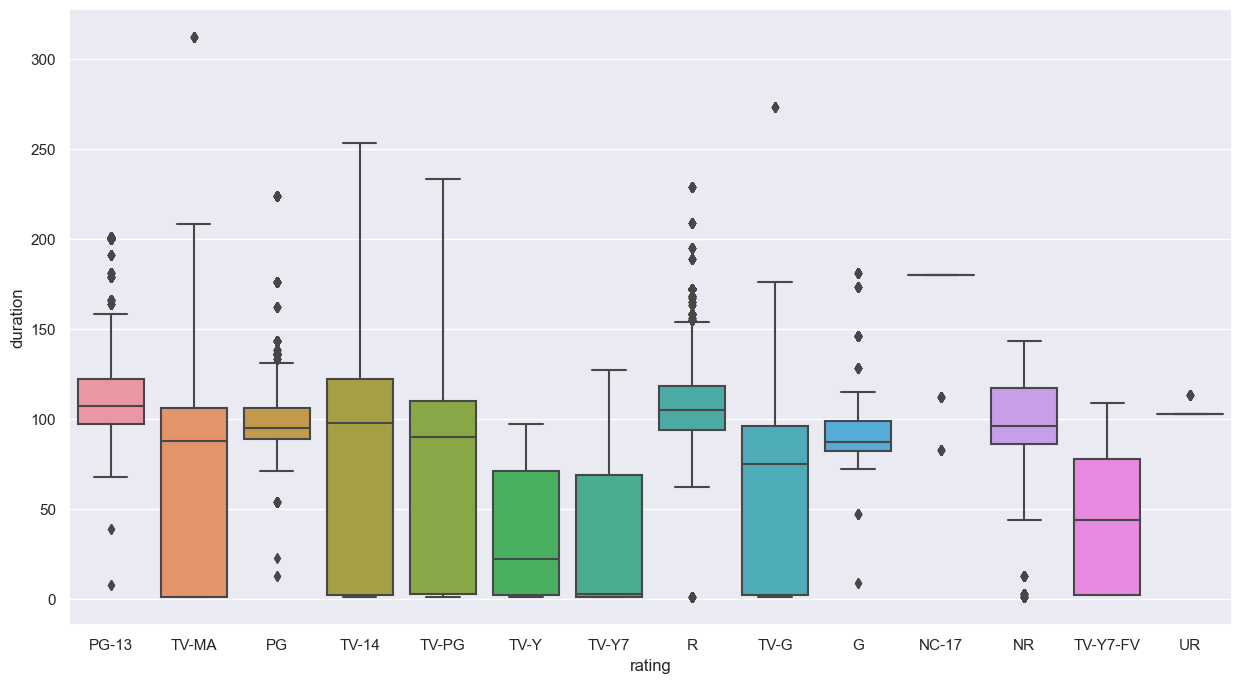

In [119]:
plt.figure(figsize=(15,8))
sns.boxplot(x = df['rating'], y = df['duration'])

<AxesSubplot:xlabel='rating', ylabel='duration'>

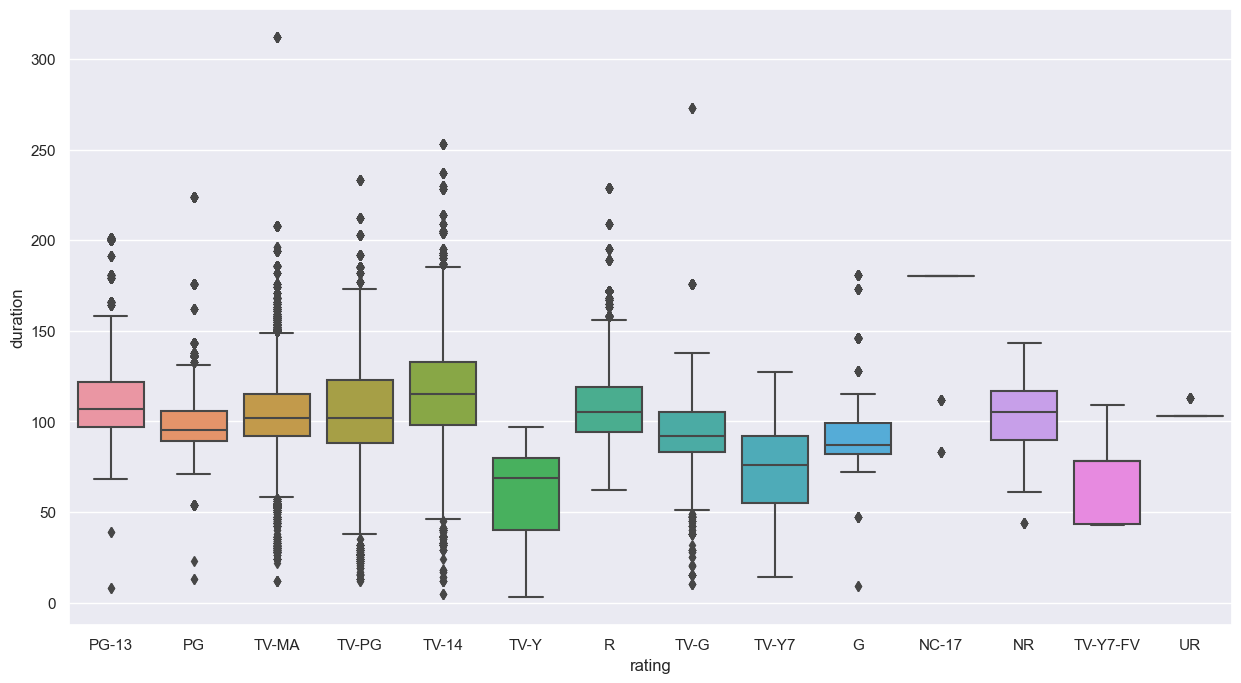

In [120]:
plt.figure(figsize=(15,8))
sns.boxplot(x = df[df["type"]=="Movie"]['rating'], y = df[df["type"]=="Movie"]['duration'])

<AxesSubplot:xlabel='rating', ylabel='duration'>

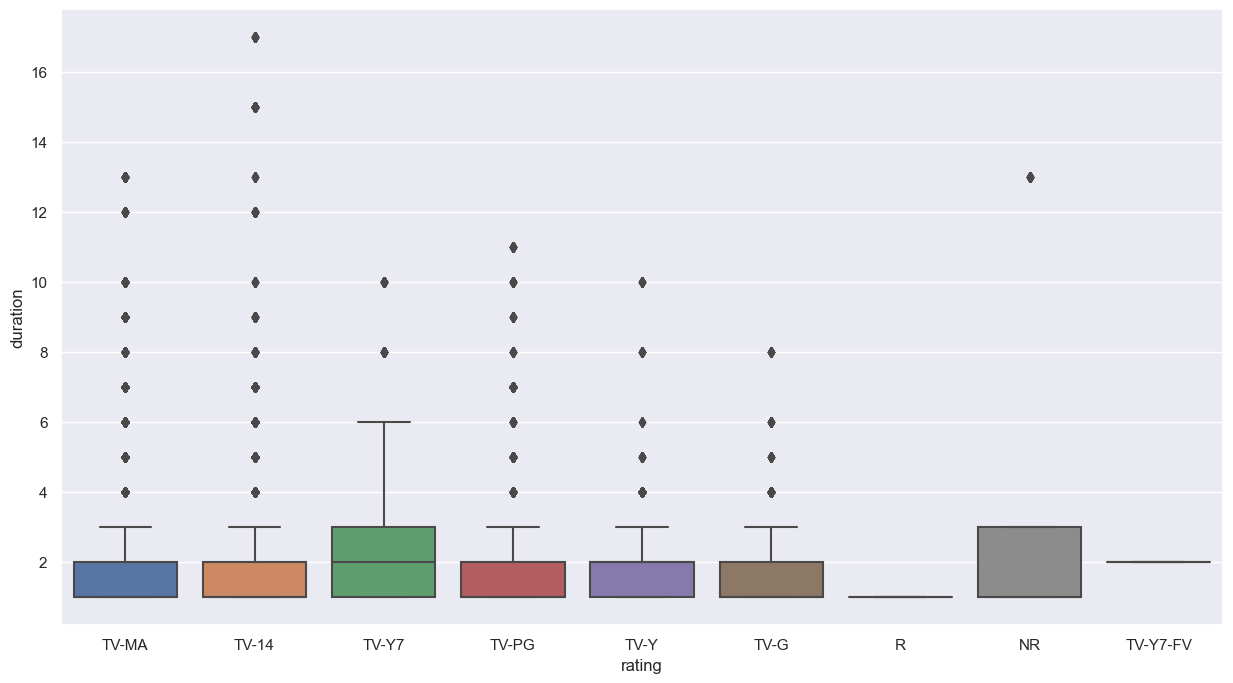

In [121]:
plt.figure(figsize=(15,8))
sns.boxplot(x = df[df["type"]=="TV Show"]['rating'], y = df[df["type"]=="TV Show"]['duration'])

In [122]:
df

title                   cast         director  \
0       Dick Johnson Is Dead               No_Actor  Kirsten Johnson   
1              Blood & Water             Ama Qamata      No_Director   
2              Blood & Water             Ama Qamata      No_Director   
3              Blood & Water             Ama Qamata      No_Director   
4              Blood & Water            Khosi Ngema      No_Director   
...                      ...                    ...              ...   
201986                Zubaan         Anita Shabdish      Mozez Singh   
201987                Zubaan         Anita Shabdish      Mozez Singh   
201988                Zubaan  Chittaranjan Tripathy      Mozez Singh   
201989                Zubaan  Chittaranjan Tripathy      Mozez Singh   
201990                Zubaan  Chittaranjan Tripathy      Mozez Singh   

              country                   genre     type date_added rating  \
0       United States           Documentaries    Movie 2021-09-25  PG-13   
1        South Africa  International TV Shows  TV Show 2021-09-24  TV-MA   
2        South Africa               TV Dramas  TV Show 2021-09-24  TV-MA   
3        South Africa            TV Mysteries  TV Show 2021-09-24  TV-MA   
4        South Africa  International TV Shows  TV Show 2021-09-24  TV-MA   
...               ...                     ...      ...        ...    ...   
201986          India    International Movies    Movie 2019-03-02  TV-14   
201987          India        Music & Musicals    Movie 2019-03-02  TV-14   
201988          India                  Dramas    Movie 2019-03-02  TV-14   
201989          India    International Movies    Movie 2019-03-02  TV-14   
201990          India        Music & Musicals    Movie 2019-03-02  TV-14   

       duration  release_year  
0            90          2020  
1             2          2021  
2             2          2021  
3             2          2021  
4             2          2021  
...         ...           ...  
201986      111          2015  
201987      111          2015  
201988      111          2015  
201989      111          2015  
201990      111          2015  

[201991 rows x 10 columns]

In [123]:
country_movie = df[df["type"]=="Movie"].drop_duplicates(subset='title')["country"].value_counts().head(13).reset_index()

In [124]:
country_movie

index  country
0    United States     2363
1            India      927
2       No_country      440
3   United Kingdom      380
4           Canada      187
5           France      148
6            Spain      129
7            Egypt       98
8          Nigeria       87
9           Mexico       86
10           Japan       85
11       Indonesia       83
12          Turkey       81

In [125]:
import plotly.express as px

In [126]:
px.funnel(country_movie, x='country', y='index')

In [127]:
df.columns

Index(['title', 'cast', 'director', 'country', 'genre', 'type', 'date_added',
       'rating', 'duration', 'release_year'],
      dtype='object')

In [128]:
df.genre.unique()

array(['Documentaries', 'International TV Shows', 'TV Dramas',
       'TV Mysteries', 'Crime TV Shows', 'TV Action & Adventure',
       'Docuseries', 'Reality TV', 'Romantic TV Shows', 'TV Comedies',
       'TV Horror', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'British TV Shows',
       'Comedies', 'Spanish-Language TV Shows', 'Thrillers',
       'Romantic Movies', 'Music & Musicals', 'Horror Movies',
       'Sci-Fi & Fantasy', 'TV Thrillers', "Kids' TV",
       'Action & Adventure', 'TV Sci-Fi & Fantasy', 'Classic Movies',
       'Anime Features', 'Sports Movies', 'Anime Series',
       'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows',
       'Cult Movies', 'TV Shows', 'Faith & Spirituality', 'LGBTQ Movies',
       'Stand-Up Comedy', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV'], dtype=object)

### 4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis

In [129]:
df.head()

title         cast         director        country  \
0  Dick Johnson Is Dead     No_Actor  Kirsten Johnson  United States   
1         Blood & Water   Ama Qamata      No_Director   South Africa   
2         Blood & Water   Ama Qamata      No_Director   South Africa   
3         Blood & Water   Ama Qamata      No_Director   South Africa   
4         Blood & Water  Khosi Ngema      No_Director   South Africa   

                    genre     type date_added rating duration  release_year  
0           Documentaries    Movie 2021-09-25  PG-13       90          2020  
1  International TV Shows  TV Show 2021-09-24  TV-MA        2          2021  
2               TV Dramas  TV Show 2021-09-24  TV-MA        2          2021  
3            TV Mysteries  TV Show 2021-09-24  TV-MA        2          2021  
4  International TV Shows  TV Show 2021-09-24  TV-MA        2          2021

In [130]:
df[df["type"]=="Movie"]

title                   cast  \
0                   Dick Johnson Is Dead               No_Actor   
159     My Little Pony: A New Generation        Vanessa Hudgens   
160     My Little Pony: A New Generation        Vanessa Hudgens   
161     My Little Pony: A New Generation           Kimiko Glenn   
162     My Little Pony: A New Generation           Kimiko Glenn   
...                                  ...                    ...   
201986                            Zubaan         Anita Shabdish   
201987                            Zubaan         Anita Shabdish   
201988                            Zubaan  Chittaranjan Tripathy   
201989                            Zubaan  Chittaranjan Tripathy   
201990                            Zubaan  Chittaranjan Tripathy   

               director        country                     genre   type  \
0       Kirsten Johnson  United States             Documentaries  Movie   
159       Robert Cullen     No_country  Children & Family Movies  Movie   
160      José Luis Ucha     No_country  Children & Family Movies  Movie   
161       Robert Cullen     No_country  Children & Family Movies  Movie   
162      José Luis Ucha     No_country  Children & Family Movies  Movie   
...                 ...            ...                       ...    ...   
201986      Mozez Singh          India      International Movies  Movie   
201987      Mozez Singh          India          Music & Musicals  Movie   
201988      Mozez Singh          India                    Dramas  Movie   
201989      Mozez Singh          India      International Movies  Movie   
201990      Mozez Singh          India          Music & Musicals  Movie   

       date_added rating duration  release_year  
0      2021-09-25  PG-13       90          2020  
159    2021-09-24     PG       91          2021  
160    2021-09-24     PG       91          2021  
161    2021-09-24     PG       91          2021  
162    2021-09-24     PG       91          2021  
...           ...    ...      ...           ...  
201986 2019-03-02  TV-14      111          2015  
201987 2019-03-02  TV-14      111          2015  
201988 2019-03-02  TV-14      111          2015  
201989 2019-03-02  TV-14      111          2015  
201990 2019-03-02  TV-14      111          2015  

[145843 rows x 10 columns]

<AxesSubplot:xlabel='duration', ylabel='Count'>

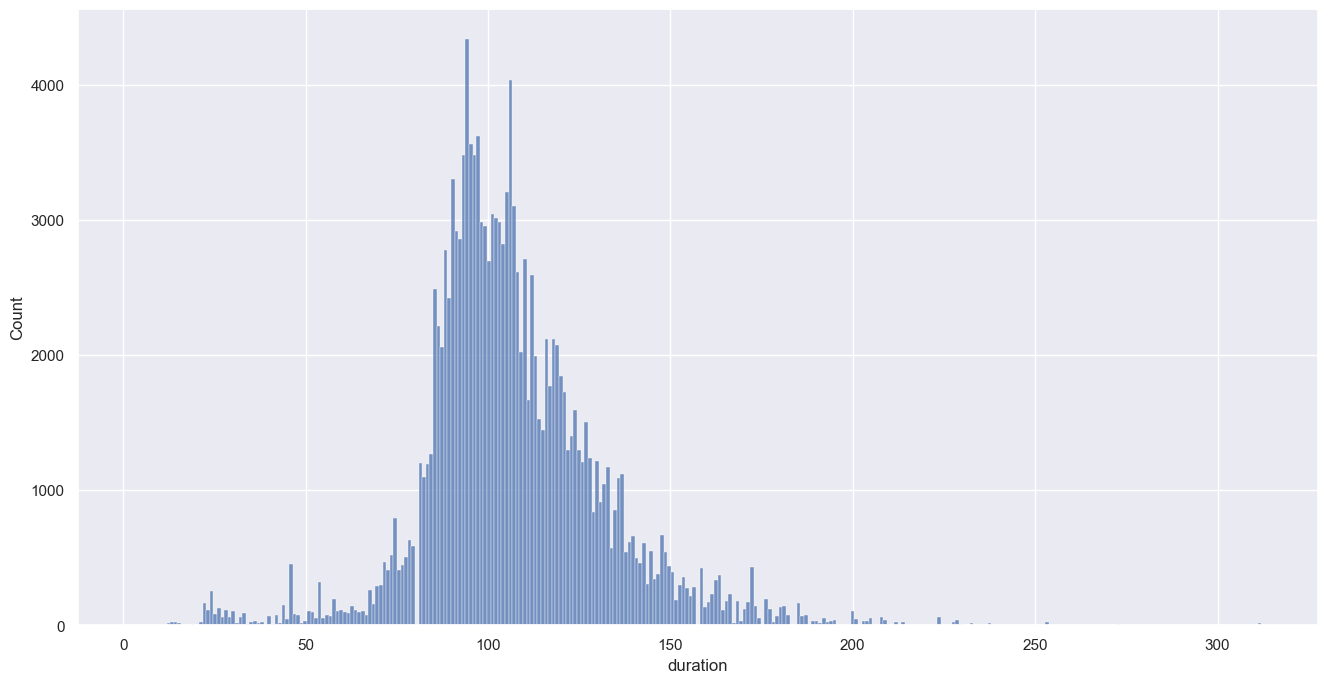

In [131]:
plt.figure(figsize=(16,8))
sns.histplot(data=df[df["type"]=="Movie"]["duration"])

/Users/enercent/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

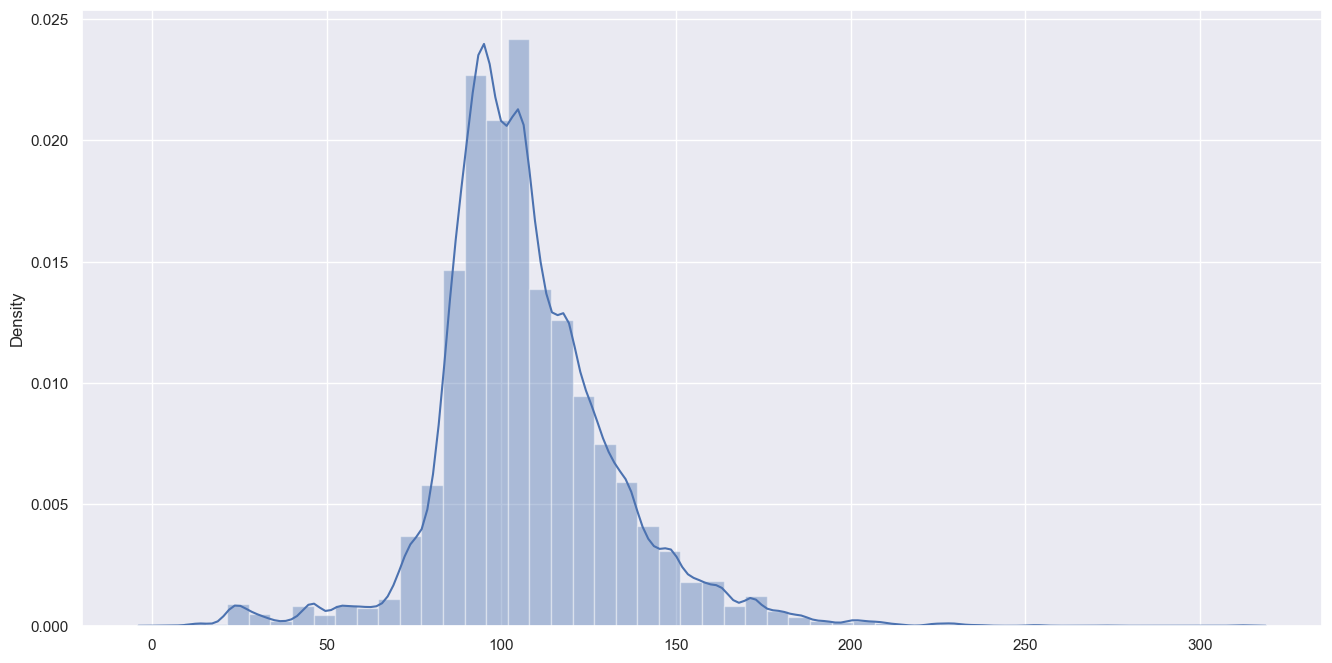

In [132]:
plt.figure(figsize=(16,8))
sns.distplot(x=df[df["type"]=="Movie"]["duration"])

In [133]:
countrys_cnt = df[df["type"]=="Movie"].drop_duplicates(subset='title')

In [134]:
countrys_cnt.head(5)

title              cast             director  \
0                Dick Johnson Is Dead          No_Actor      Kirsten Johnson   
159  My Little Pony: A New Generation   Vanessa Hudgens        Robert Cullen   
179                           Sankofa      Kofi Ghanaba         Haile Gerima   
331                      The Starling  Melissa McCarthy       Theodore Melfi   
431                      Je Suis Karl       Luna Wedler  Christian Schwochow   

           country                     genre   type date_added rating  \
0    United States             Documentaries  Movie 2021-09-25  PG-13   
159     No_country  Children & Family Movies  Movie 2021-09-24     PG   
179  United States                    Dramas  Movie 2021-09-24  TV-MA   
331  United States                  Comedies  Movie 2021-09-24  PG-13   
431        Germany                    Dramas  Movie 2021-09-23  TV-MA   

    duration  release_year  
0         90          2020  
159       91          2021  
179      125          1993  
331      104          2021  
431      127          2021

In [135]:
countrys_cnt = countrys_cnt.loc[(countrys_cnt["country"]=="United States")|(countrys_cnt["country"]=="India")|(countrys_cnt["country"]=="United Kingdom")|(countrys_cnt["country"]=="Canada")|(countrys_cnt["country"]=="France")|(countrys_cnt["country"]=="Spain")|(countrys_cnt["country"]=="Egypt")|(countrys_cnt["country"]=="Nigeria")|(countrys_cnt["country"]=="Mexico")|(countrys_cnt["country"]=="Japan")|(countrys_cnt["country"]=="Indonesia")|(countrys_cnt["country"]=="Turkey")]

<AxesSubplot:xlabel='country', ylabel='count'>

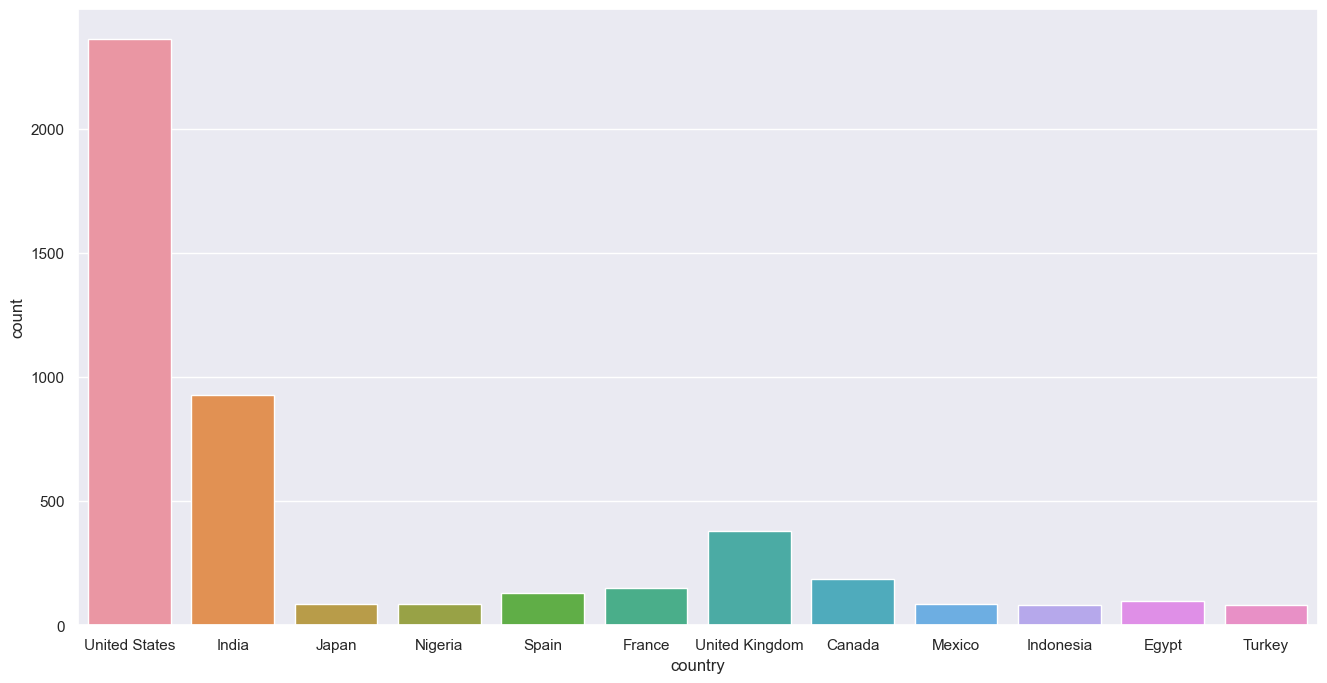

In [136]:
plt.figure(figsize=(16,8))
sns.countplot(data=countrys_cnt, x="country")


### 4.2 For categorical variable(s): Boxplot

<AxesSubplot:xlabel='rating', ylabel='duration'>

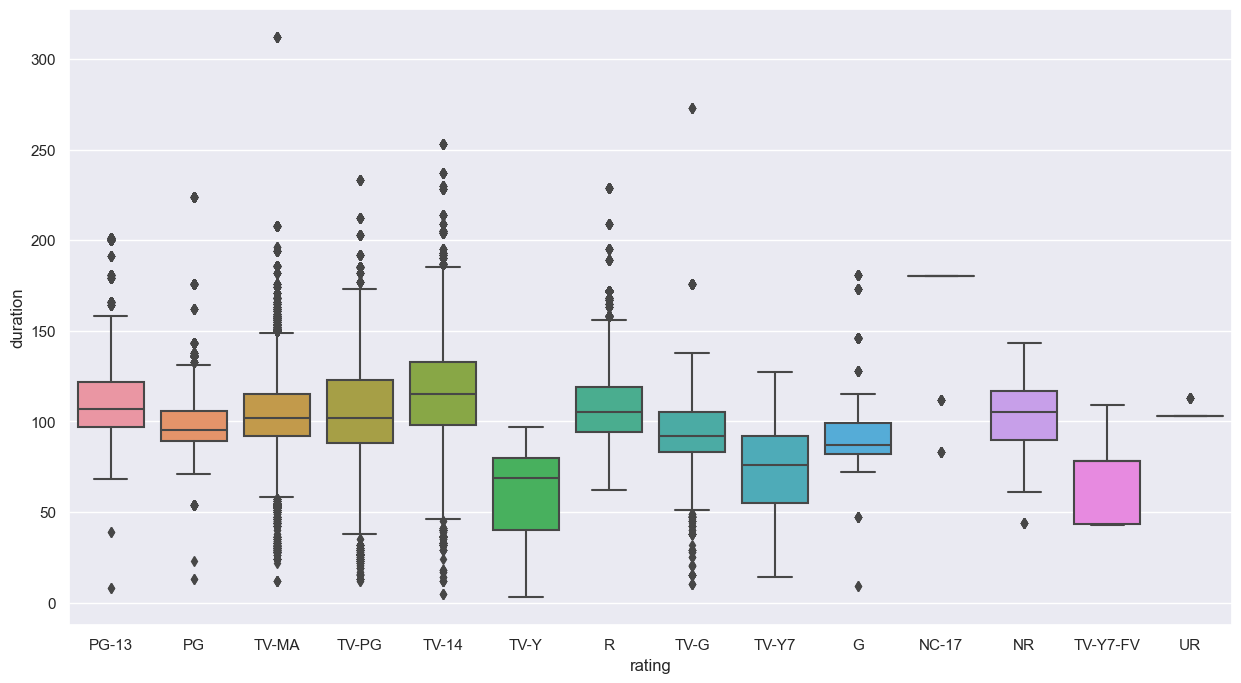

In [137]:
plt.figure(figsize=(15,8))
sns.boxplot(x = df[df["type"]=="Movie"]['rating'], y = df[df["type"]=="Movie"]['duration'])

<AxesSubplot:xlabel='rating', ylabel='duration'>

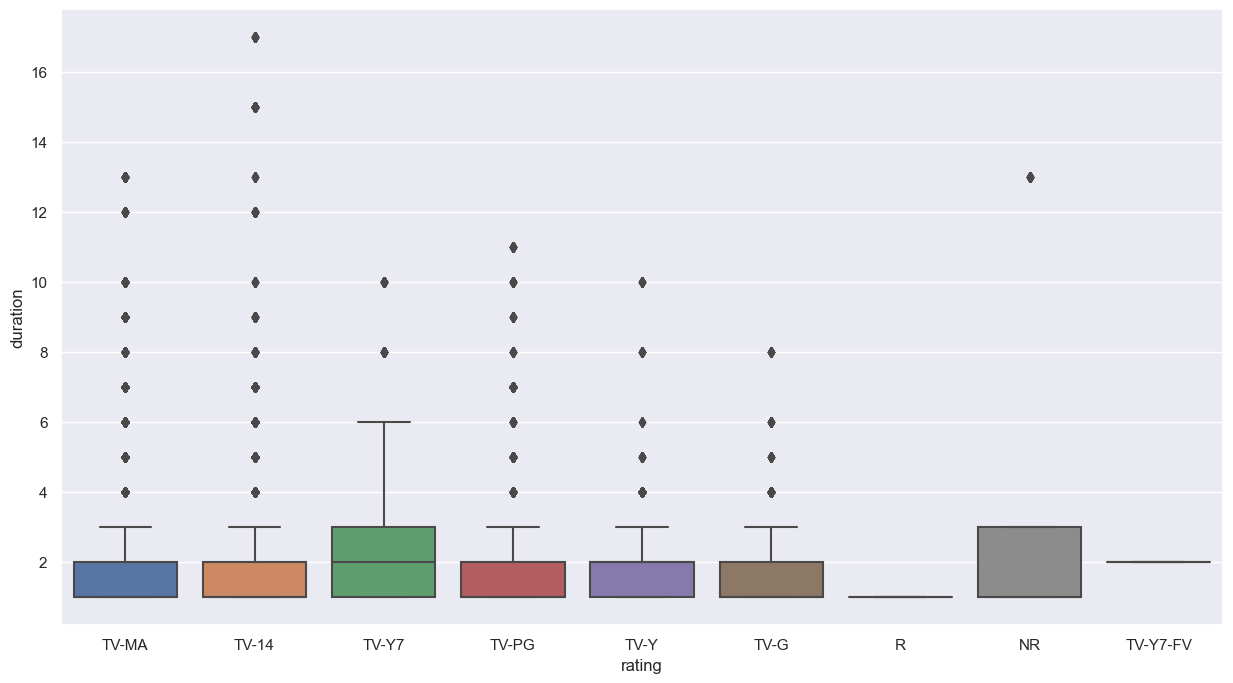

In [138]:
plt.figure(figsize=(15,8))
sns.boxplot(x = df[df["type"]=="TV Show"]['rating'], y = df[df["type"]=="TV Show"]['duration'])

### 4.3 For correlation: Heatmaps, Pairplots

In [139]:
df

title                   cast         director  \
0       Dick Johnson Is Dead               No_Actor  Kirsten Johnson   
1              Blood & Water             Ama Qamata      No_Director   
2              Blood & Water             Ama Qamata      No_Director   
3              Blood & Water             Ama Qamata      No_Director   
4              Blood & Water            Khosi Ngema      No_Director   
...                      ...                    ...              ...   
201986                Zubaan         Anita Shabdish      Mozez Singh   
201987                Zubaan         Anita Shabdish      Mozez Singh   
201988                Zubaan  Chittaranjan Tripathy      Mozez Singh   
201989                Zubaan  Chittaranjan Tripathy      Mozez Singh   
201990                Zubaan  Chittaranjan Tripathy      Mozez Singh   

              country                   genre     type date_added rating  \
0       United States           Documentaries    Movie 2021-09-25  PG-13   
1        South Africa  International TV Shows  TV Show 2021-09-24  TV-MA   
2        South Africa               TV Dramas  TV Show 2021-09-24  TV-MA   
3        South Africa            TV Mysteries  TV Show 2021-09-24  TV-MA   
4        South Africa  International TV Shows  TV Show 2021-09-24  TV-MA   
...               ...                     ...      ...        ...    ...   
201986          India    International Movies    Movie 2019-03-02  TV-14   
201987          India        Music & Musicals    Movie 2019-03-02  TV-14   
201988          India                  Dramas    Movie 2019-03-02  TV-14   
201989          India    International Movies    Movie 2019-03-02  TV-14   
201990          India        Music & Musicals    Movie 2019-03-02  TV-14   

       duration  release_year  
0            90          2020  
1             2          2021  
2             2          2021  
3             2          2021  
4             2          2021  
...         ...           ...  
201986      111          2015  
201987      111          2015  
201988      111          2015  
201989      111          2015  
201990      111          2015  

[201991 rows x 10 columns]

In [140]:
df["date_added"].dt.month_name()

0         September
1         September
2         September
3         September
4         September
            ...    
201986        March
201987        March
201988        March
201989        March
201990        March
Name: date_added, Length: 201991, dtype: object

In [141]:
df["Months"] = df["date_added"].dt.month_name()

In [142]:
df["year"] = df["date_added"].dt.year

Text(0.5, 1.0, 'Movies/ TV shows Added time')

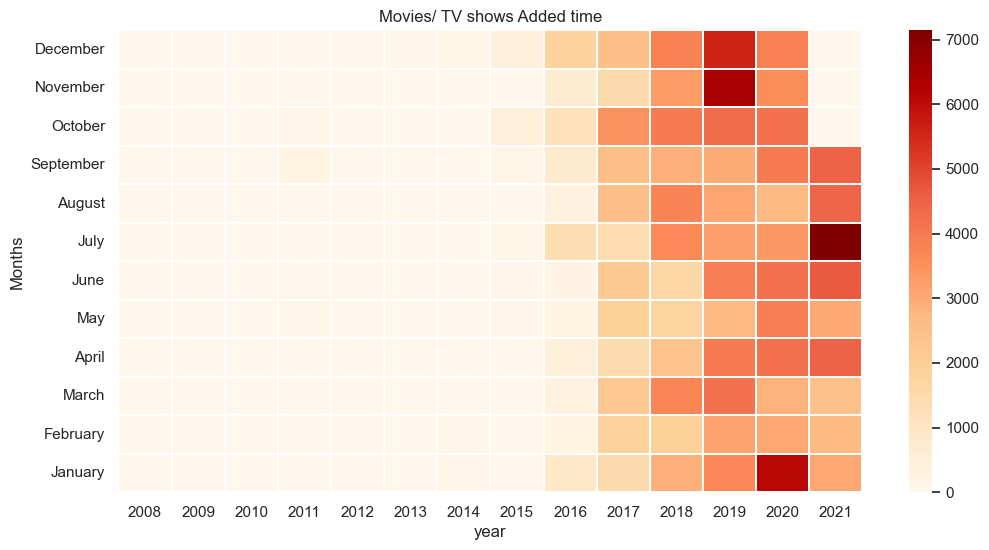

In [143]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]

df4 = df.groupby('year')['Months'].value_counts().unstack().fillna(0)[month_order].T

plt.figure(figsize=(12, 6))
sns.heatmap(df4,linewidths = 0.05, cmap="OrRd")
plt.title('Movies/ TV shows Added time')

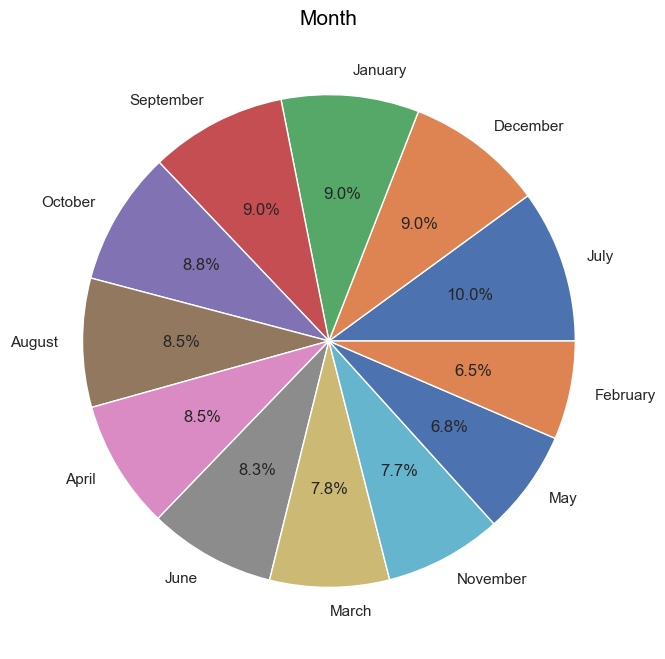

In [333]:
labels = df['Months'].value_counts().index
sizes = df['Months'].value_counts()
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%')
plt.title('Month',color = 'Black',fontsize = 15)
plt.show()

In [145]:
df_movie = df[df['type']=='Movie'].groupby('year').count()
df_tv = df[df['type']=='TV Show'].groupby('year').count()

In [146]:
import numpy as np
import plotly.graph_objs as go
import plotly
from plotly.subplots import make_subplots

In [147]:
mvr=df[df['type']=='Movie'].year.value_counts().head(10)
tvr=df[df['type']=='TV Show'].year.value_counts().head(10)
fig =make_subplots(rows=1,cols=2,specs=[[{'type':'domain'}, {'type':'domain'}]],
                   subplot_titles=["Most movies release in a year","Most TV shows release in a year"])
fig.add_trace(go.Pie(labels=mvr.index,values=mvr.values,name="Movies"),col=1 ,row=1)
fig.add_trace(go.Pie(labels=tvr.index,values=tvr.values,name="TV shows"),col=2 ,row=1)
fig.update_layout({"plot_bgcolor": '#42e2b8',
                  "paper_bgcolor": '#42e2b8'})

In [148]:
import plotly.graph_objects as go

In [149]:
df_movie.reset_index(level=0, inplace=True)
df_tv.reset_index(level=0, inplace=True)
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_movie['year'], y=df_movie['title'],
                    mode='lines',
                    name='Movies', marker_color='mediumpurple'))
fig.add_trace(go.Scatter(x=df_tv['year'], y=df_tv['title'],
                    mode='lines',
                    name='TV Shows', marker_color='lightcoral'))
fig.update_layout(title_text='Trend Movies vs TV Shows in recent years', title_x=0.5)
fig.show()

In [150]:
df

title                   cast         director  \
0       Dick Johnson Is Dead               No_Actor  Kirsten Johnson   
1              Blood & Water             Ama Qamata      No_Director   
2              Blood & Water             Ama Qamata      No_Director   
3              Blood & Water             Ama Qamata      No_Director   
4              Blood & Water            Khosi Ngema      No_Director   
...                      ...                    ...              ...   
201986                Zubaan         Anita Shabdish      Mozez Singh   
201987                Zubaan         Anita Shabdish      Mozez Singh   
201988                Zubaan  Chittaranjan Tripathy      Mozez Singh   
201989                Zubaan  Chittaranjan Tripathy      Mozez Singh   
201990                Zubaan  Chittaranjan Tripathy      Mozez Singh   

              country                   genre     type date_added rating  \
0       United States           Documentaries    Movie 2021-09-25  PG-13   
1        South Africa  International TV Shows  TV Show 2021-09-24  TV-MA   
2        South Africa               TV Dramas  TV Show 2021-09-24  TV-MA   
3        South Africa            TV Mysteries  TV Show 2021-09-24  TV-MA   
4        South Africa  International TV Shows  TV Show 2021-09-24  TV-MA   
...               ...                     ...      ...        ...    ...   
201986          India    International Movies    Movie 2019-03-02  TV-14   
201987          India        Music & Musicals    Movie 2019-03-02  TV-14   
201988          India                  Dramas    Movie 2019-03-02  TV-14   
201989          India    International Movies    Movie 2019-03-02  TV-14   
201990          India        Music & Musicals    Movie 2019-03-02  TV-14   

       duration  release_year     Months  year  
0            90          2020  September  2021  
1             2          2021  September  2021  
2             2          2021  September  2021  
3             2          2021  September  2021  
4             2          2021  September  2021  
...         ...           ...        ...   ...  
201986      111          2015      March  2019  
201987      111          2015      March  2019  
201988      111          2015      March  2019  
201989      111          2015      March  2019  
201990      111          2015      March  2019  

[201991 rows x 12 columns]

In [151]:
df_cast_director["cast"].value_counts()

nan                      960
Anupam Kher               43
Julie Tejwani             39
Rupa Bhimani              37
James Franco              37
                        ... 
Showkar Janaki             1
Karthi                     1
Jyothika                   1
Rosa Blasi                 1
Chittaranjan Tripathy      1
Name: cast, Length: 36440, dtype: int64

In [152]:
df_cast_director[["cast", "director"]].value_counts()

cast              director       
nan               nan                352
Takahiro Sakurai  nan                 24
Julie Tejwani     Rajiv Chilaka       19
Rajesh Kava       Rajiv Chilaka       19
Yuki Kaji         nan                 18
                                    ... 
Hilliary Begley   Anne Fletcher        1
Him Law           Teddy Chan           1
Hima Singh        Jatla Siddartha      1
Himani Shivpuri   K.C. Bokadia         1
Ṣọpẹ́ Dìrísù      Remi Weekes          1
Length: 62741, dtype: int64

In [153]:
df.loc[df["cast"]=="Julie Tejwani"]

title           cast  \
990                                          Chhota Bheem  Julie Tejwani   
2006                                          Mighty Raju  Julie Tejwani   
10055                       Chhota Bheem - Dinosaur World  Julie Tejwani   
10059                        Chhota Bheem - Neeli Pahaadi  Julie Tejwani   
10066                               Chhota Bheem & Ganesh  Julie Tejwani   
10073                  Chhota Bheem & Krishna: Mayanagari  Julie Tejwani   
10080   Chhota Bheem & Krishna: Pataliputra- City of t...  Julie Tejwani   
10087                  Chhota Bheem And The Broken Amulet  Julie Tejwani   
10094              Chhota Bheem And The Crown of Valhalla  Julie Tejwani   
10101                Chhota Bheem and the Incan Adventure  Julie Tejwani   
10108                 Chhota Bheem and The ShiNobi Secret  Julie Tejwani   
10115                            Chhota Bheem Aur Hanuman  Julie Tejwani   
10122                            Chhota Bheem aur Krishna  Julie Tejwani   
10129                 Chhota Bheem aur Krishna vs Zimbara  Julie Tejwani   
10137                      Chhota Bheem in African Safari  Julie Tejwani   
10141                       Chhota Bheem Ka Roosi Romanch  Julie Tejwani   
10142                       Chhota Bheem Ka Roosi Romanch  Julie Tejwani   
10161                       Chhota Bheem: Bheem vs Aliens  Julie Tejwani   
10162                       Chhota Bheem: Bheem vs Aliens  Julie Tejwani   
10174                Chhota Bheem: Dholakpur to Kathmandu  Julie Tejwani   
10182                            Chhota Bheem: Dus Pe Dus  Julie Tejwani   
10183                            Chhota Bheem: Dus Pe Dus  Julie Tejwani   
10195                      Chhota Bheem: Journey to Petra  Julie Tejwani   
10201                     Chhota Bheem: Master of Shaolin  Julie Tejwani   
10207                   Chhota Bheem: The Rise of Kirmada  Julie Tejwani   
64930               Chhota Bheem and the Curse of Damyaan  Julie Tejwani   
72986                 Chhota Bheem Kung Fu Dhamaka Series  Julie Tejwani   
139177                             Antariksha Ke Rakhwale  Julie Tejwani   
145744                       Chhota Bheem Aur Kaala Yodha  Julie Tejwani   
145745                       Chhota Bheem Aur Kaala Yodha  Julie Tejwani   
145762                   Chhota Bheem Ka Romani Adventure  Julie Tejwani   
145763                   Chhota Bheem Ka Romani Adventure  Julie Tejwani   
145780                    Chhota Bheem Ka Troll Se Takkar  Julie Tejwani   
145781                    Chhota Bheem Ka Troll Se Takkar  Julie Tejwani   
145806                        Chhota Bheem Kungfu Dhamaka  Julie Tejwani   
145807                        Chhota Bheem Kungfu Dhamaka  Julie Tejwani   
165186                                     Krishna Balram  Julie Tejwani   
180465                                    Samudri Lootere  Julie Tejwani   
185420                                        Super Bheem  Julie Tejwani   
185426                         Super Bheem Bana Vajraveer  Julie Tejwani   

                director     country                     genre     type  \
990          No_Director       India                  Kids' TV  TV Show   
2006         No_Director  No_country                  Kids' TV  TV Show   
10055   Sidheswar Shukla  No_country  Children & Family Movies    Movie   
10059      Rajiv Chilaka  No_country  Children & Family Movies    Movie   
10066      Rajiv Chilaka  No_country  Children & Family Movies    Movie   
10073      Rajiv Chilaka  No_country  Children & Family Movies    Movie   
10080      Rajiv Chilaka  No_country  Children & Family Movies    Movie   
10087      Rajiv Chilaka       India  Children & Family Movies    Movie   
10094      Rajiv Chilaka  No_country  Children & Family Movies    Movie   
10101      Rajiv Chilaka  No_country  Children & Family Movies    Movie   
10108      Rajiv Chilaka  No_country  Children & Family Movies    Movie   
10115      Rajiv Chilaka  No_countr

In [154]:
df[(df[["cast", "director"]]!=["No_Actor", "No_Director"])&(df[["cast", "director"]]!=["NaN", "NaN"])][["cast", "director"]]

cast         director
0                         NaN  Kirsten Johnson
1                  Ama Qamata              NaN
2                  Ama Qamata              NaN
3                  Ama Qamata              NaN
4                 Khosi Ngema              NaN
...                       ...              ...
201986         Anita Shabdish      Mozez Singh
201987         Anita Shabdish      Mozez Singh
201988  Chittaranjan Tripathy      Mozez Singh
201989  Chittaranjan Tripathy      Mozez Singh
201990  Chittaranjan Tripathy      Mozez Singh

[201991 rows x 2 columns]

In [155]:
df[["cast", "director"]].value_counts()

cast                director     
No_Actor            No_Director      738
David Attenborough  No_Director       72
Takahiro Sakurai    No_Director       54
Yuki Kaji           No_Director       43
Jun Fukuyama        No_Director       38
                                    ... 
Eamon Farren        Nathan Wiley       1
Eamon Brennan       No_Director        1
Stephen Tobolowsky  Brad Anderson      1
Lara Heller         Tekin Girgin       1
 Jr.                No_Director        1
Length: 62741, dtype: int64

In [156]:
df[((df["cast"]!="No_Actor")&(df["cast"]!="NaN"))&((df["director"]!="No_Director")&(df["director"]!="NaN"))]

title                   cast         director     country  \
58      Ganglands          Sami Bouajila  Julien Leclercq  No_country   
59      Ganglands          Sami Bouajila  Julien Leclercq  No_country   
60      Ganglands          Sami Bouajila  Julien Leclercq  No_country   
61      Ganglands           Tracy Gotoas  Julien Leclercq  No_country   
62      Ganglands           Tracy Gotoas  Julien Leclercq  No_country   
...           ...                    ...              ...         ...   
201986     Zubaan         Anita Shabdish      Mozez Singh       India   
201987     Zubaan         Anita Shabdish      Mozez Singh       India   
201988     Zubaan  Chittaranjan Tripathy      Mozez Singh       India   
201989     Zubaan  Chittaranjan Tripathy      Mozez Singh       India   
201990     Zubaan  Chittaranjan Tripathy      Mozez Singh       India   

                         genre     type date_added rating duration  \
58              Crime TV Shows  TV Show 2021-09-24  TV-MA        1   
59      International TV Shows  TV Show 2021-09-24  TV-MA        1   
60       TV Action & Adventure  TV Show 2021-09-24  TV-MA        1   
61              Crime TV Shows  TV Show 2021-09-24  TV-MA        1   
62      International TV Shows  TV Show 2021-09-24  TV-MA        1   
...                        ...      ...        ...    ...      ...   
201986    International Movies    Movie 2019-03-02  TV-14      111   
201987        Music & Musicals    Movie 2019-03-02  TV-14      111   
201988                  Dramas    Movie 2019-03-02  TV-14      111   
201989    International Movies    Movie 2019-03-02  TV-14      111   
201990        Music & Musicals    Movie 2019-03-02  TV-14      111   

        release_year     Months  year  
58              2021  September  2021  
59              2021  September  2021  
60              2021  September  2021  
61              2021  September  2021  
62              2021  September  2021  
...              ...        ...   ...  
201986          2015      March  2019  
201987          2015      March  2019  
201988          2015      March  2019  
201989          2015      March  2019  
201990          2015      March  2019  

[149940 rows x 12 columns]

In [157]:
df[((df["cast"]!="No_Actor")&(df["cast"]!="NaN"))&((df["director"]!="No_Director")&(df["director"]!="NaN"))][["cast", "director"]].value_counts()

cast                  director      
Charlotte Gainsbourg  Lars von Trier    33
Shia LaBeouf          Lars von Trier    33
Sophie Kennedy Clark  Lars von Trier    33
Stacy Martin          Lars von Trier    33
Christian Slater      Lars von Trier    33
                                        ..
Harris Yulin          Les Mayfield       1
Harriet Beattie       John Banas         1
Harold Prince         Lonny Price        1
Harold Perrineau      Kurt Voelker       1
 Jr.                  Sam Macaroni       1
Length: 48186, dtype: int64

In [158]:
df_cast_director[(df_cast_director["cast"]!="nan")&(df_cast_director["director"]!="nan")][["cast", "director"]].value_counts()

cast              director         
Julie Tejwani     Rajiv Chilaka        19
Rajesh Kava       Rajiv Chilaka        19
Jigna Bhardwaj    Rajiv Chilaka        18
Rupa Bhimani      Rajiv Chilaka        18
Vatsal Dubey      Rajiv Chilaka        16
                                       ..
Hariata Moriarty  Briar Grace-Smith     1
                  David Stubbs          1
Harii Kaneko      Tensai Okamura        1
Harinder Bhullar  Sukhbir Singh         1
Ṣọpẹ́ Dìrísù      Remi Weekes           1
Length: 48186, dtype: int64

### 6. Insights based on Non-Graphical and Visual Analysis

In [159]:
df.groupby("cast")["title"].count()

cast
 Jr.                     2
"Riley" Lakdhar Dridi    3
'Najite Dede             5
2 Chainz                 1
2Mex                     2
                        ..
Şevket Çoruh             2
Şinasi Yurtsever         9
Şükran Ovalı             2
Şükrü Özyıldız           5
Ṣọpẹ́ Dìrísù             2
Name: title, Length: 36440, dtype: int64

In [160]:
df.groupby("cast")["title"].count().sort_values(ascending=False)

cast
No_Actor             2146
Liam Neeson           161
Alfred Molina         160
John Krasinski        139
Salma Hayek           130
                     ... 
Cynthia Capers          1
Cynda Williams          1
Samantha Gracie         1
Valente Rodriguez       1
Joy Kate Lawson         1
Name: title, Length: 36440, dtype: int64

### 6.1 Comments on the range of attributes

#### Top 10 Actors

In [238]:
df[df["cast"]!="No_Actor"].groupby(["cast"])["title"].nunique().sort_values(ascending=False).head(10)

cast
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Name: title, dtype: int64

#### Top 10 Directors

In [239]:
df[df["director"]!="No_Director"].groupby(["director"])["title"].nunique().sort_values(ascending=False).head(10)

director
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Youssef Chahine        12
Name: title, dtype: int64

#### Top 10 Genre

In [240]:
df.groupby("genre")["title"].nunique().sort_values(ascending=False).head(10)

genre
International Movies      2752
Dramas                    2427
Comedies                  1674
International TV Shows    1351
Documentaries              869
Action & Adventure         859
TV Dramas                  763
Independent Movies         756
Name: title, dtype: int64

#### Top 10 Countries

In [244]:
df[df["country"]!="No_country"].groupby("country")["title"].nunique().sort_values(ascending=False).head(10)

country
United States     3689
India             1046
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Name: title, dtype: int64

### 6.2 Comments on the distribution of the variables and relationship between them

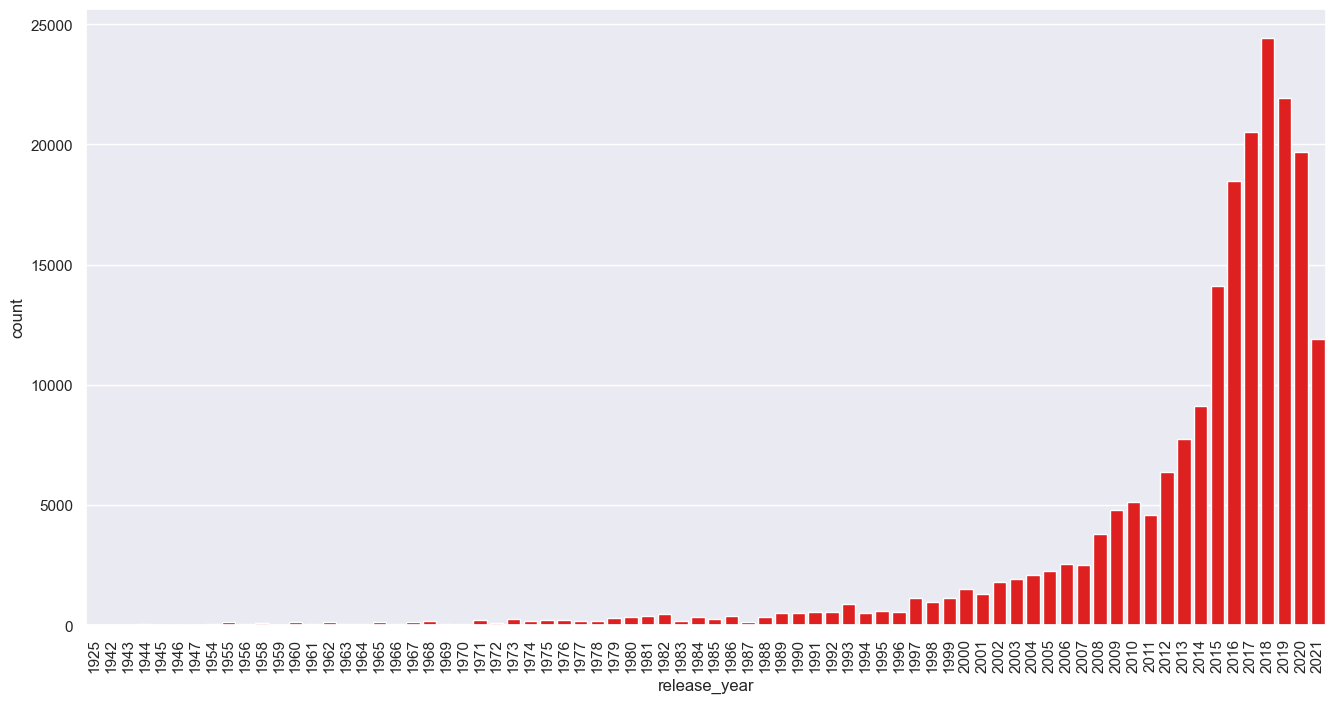

In [177]:
plt.figure(figsize=(16, 8))
sns.countplot(x ='release_year', data = df, color="red")
plt.xticks(rotation = 90)
plt.show()

#### Even though the number of movies and tv shows increases with time as more people indulge in making movies as also population increases and the scope goes up

In [197]:
print("The rating that appears most frequently:",df['rating'].mode()[0])
print("The country where the release has occured the most:",df['country'].mode()[0])
print("The most occured genre:",df['genre'].mode()[0])
print("Most movies where released in the year:",df['release_year'].mode()[0])

The rating that appears most frequently: TV-MA
The country where the release has occured the most: United States
The most occured genre: Dramas
Most movies where released in the year: 2018


Text(0.5, 1.0, 'Boxplot Distribution for movies and Tv shows')

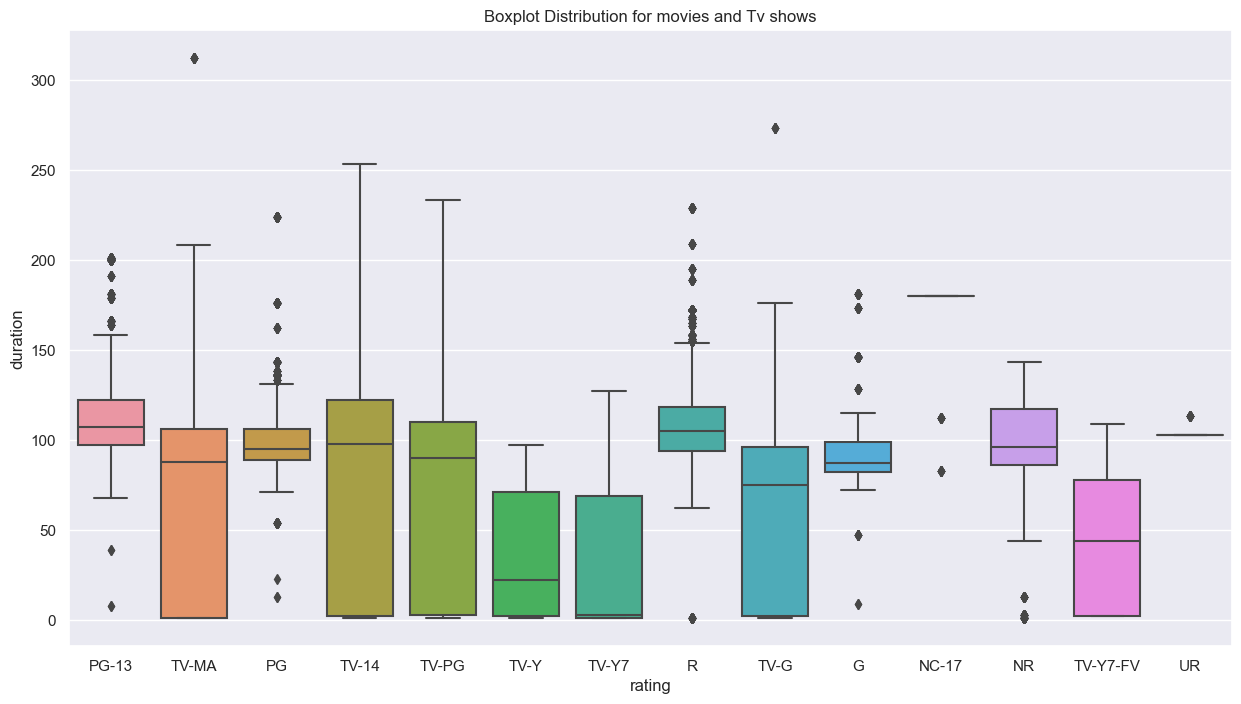

In [249]:
plt.figure(figsize=(15,8))
sns.boxplot(x = df['rating'], y = df['duration'])
plt.title("Boxplot Distribution for movies and Tv shows")

Text(0.5, 1.0, 'Boxplot Distribution for movies')

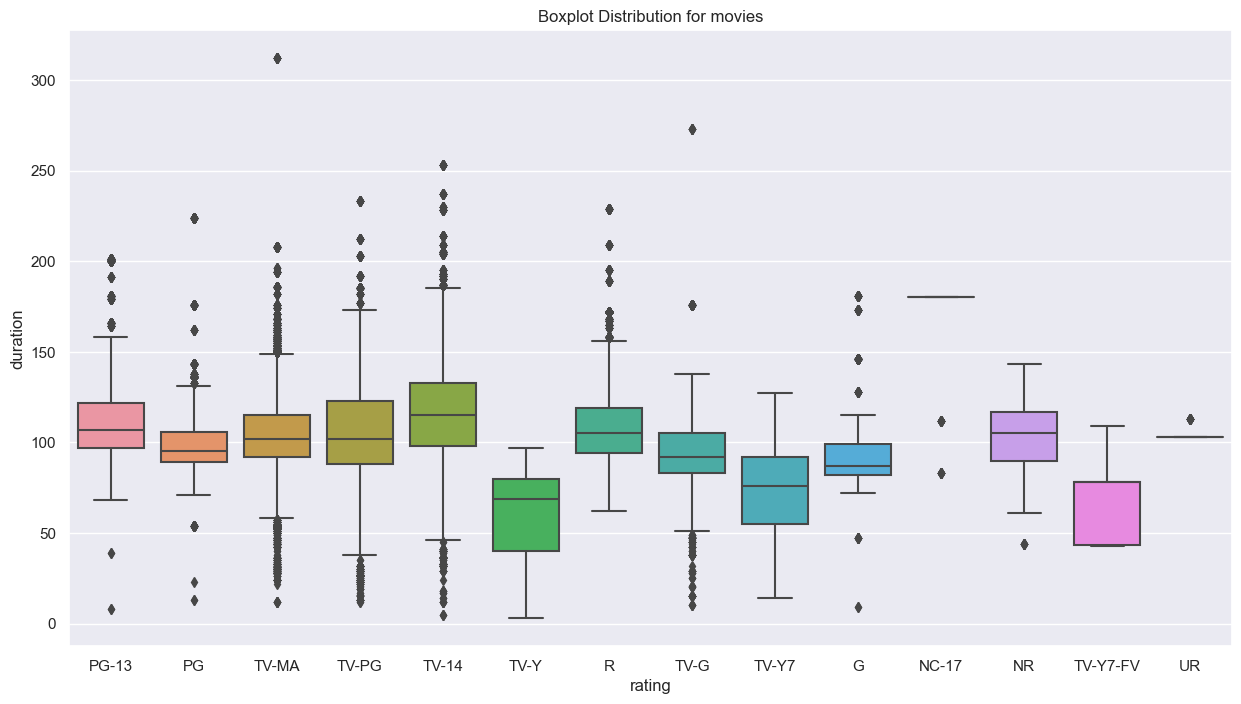

In [251]:
plt.figure(figsize=(15,8))
sns.boxplot(x = df[df["type"]=="Movie"]['rating'], y = df[df["type"]=="Movie"]['duration'])
plt.title("Boxplot Distribution for movies")

Text(0.5, 1.0, 'Boxplot Distribution for Tv shows')

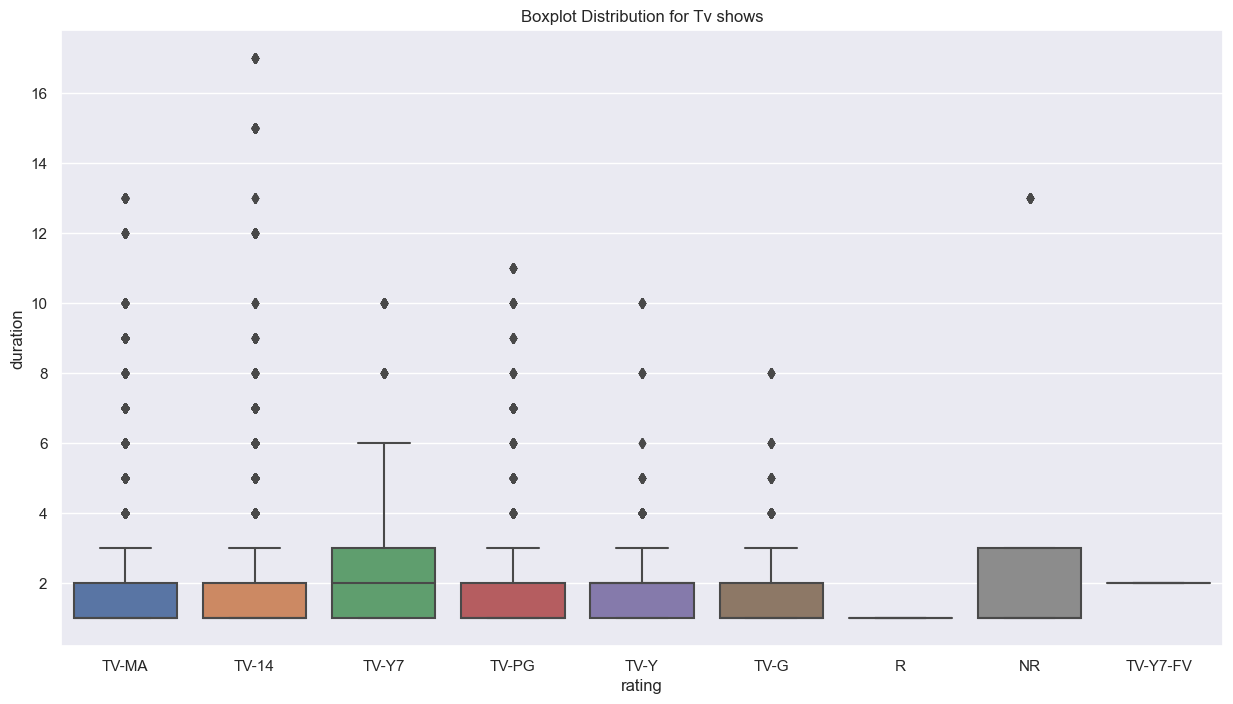

In [252]:
plt.figure(figsize=(15,8))
sns.boxplot(x = df[df["type"]=="TV Show"]['rating'], y = df[df["type"]=="TV Show"]['duration'])
plt.title("Boxplot Distribution for Tv shows")

### 6.3 Comments for each univariate and bivariate plot

#### The first boxplot shows for different movie and tv shows combined rating how is the duration value and that is why most of them start from 1 and on an average goes upto 100,120 where 1 is the season and 100 is 100 minutes

#### The second box plot is for movies and that is why the median of which lies around 90 minutes (1 and half hours) as most of the movies 

In [318]:
df[(df["duration"]>200)&(df["country"]!="No_country")]["country"].value_counts()

India             131
United States     117
United Kingdom     68
Egypt              39
New Zealand        24
Italy              20
Japan              20
Morocco            18
Name: country, dtype: int64

#### As we can also see here that most of which were indian movies and quite a few old american, UK and egyptian movies that were made quite a few years back. Whereas it is quite evident that indian movies are quite lengthy

#### The Last boxplot shows that most of the values are 1-2 as most of the series lasts two seasons and there are few TV shows or series that have made more number of series that can be viewed as outliers and the majority of which is because of the super hit shows made in the US majorly which has attracted a wider number of audiences and henceforth giving the directors the courage to keep going on towards making more such shows

In [331]:
df[(df["duration"]>4)&(df["type"]=="TV Show")].groupby("title").max().sort_values(by="duration", ascending=False).head(8)

cast       director        country  \
title                                                                  
Grey's Anatomy             T.R. Knight    No_Director  United States   
Supernatural            Samantha Smith  Phil Sgriccia  United States   
NCIS                       Sean Murray    No_Director  United States   
COMEDIANS of the world  Urzila Carlson    No_Director  United States   
Red vs. Blue               Yomary Cruz    No_Director  United States   
Heartland               Shaun Johnston    No_Director         Canada   
Criminal Minds           Thomas Gibson    No_Director  United States   
Trailer Park Boys       Tyrone Parsons    No_Director         Canada   

                                         genre     type  \
title                                                     
Grey's Anatomy                       TV Dramas  TV Show   
Supernatural                         TV Horror  TV Show   
NCIS                              TV Mysteries  TV Show   
COMEDIANS of the world             TV Comedies  TV Show   
Red vs. Blue               TV Sci-Fi & Fantasy  TV Show   
Heartland                            TV Dramas  TV Show   
Criminal Minds                    TV Mysteries  TV Show   
Trailer Park Boys       International TV Shows  TV Show   

                                          date_added rating  duration  \
title                                                                   
Grey's Anatomy         2021-07-03 00:00:00.000000000  TV-14        17   
Supernatural           2020-06-05 00:00:00.000000000  TV-14        15   
NCIS                   2018-07-01 00:00:00.000000000  TV-14        15   
COMEDIANS of the world 2019-01-01 00:00:00.000000000  TV-MA        13   
Red vs. Blue           2019-06-19 10:42:47.568237312     NR        13   
Heartland              2021-02-01 00:00:00.000000000  TV-14        13   
Criminal Minds         2017-06-30 00:00:00.000000000  TV-14        12   
Trailer Park Boys      2018-03-30 00:00:00.000000000  TV-MA        12   

                        release_year    Months  year  
title                                                 
Grey's Anatomy                  2020      July  2021  
Supernatural                    2019      June  2020  
NCIS                            2017      July  2018  
COMEDIANS of the world          2019   January  2019  
Red vs. Blue                    2015      June  2019  
Heartland                       2019  February  2021  
Criminal Minds                  2017      June  2017  
Trailer Park Boys               2018     March  2018

In [309]:
df_movie.reset_index(level=0, inplace=True)
df_tv.reset_index(level=0, inplace=True)
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_movie['year'], y=df_movie['title'],
                    mode='lines',
                    name='Movies', marker_color='mediumpurple'))
fig.add_trace(go.Scatter(x=df_tv['year'], y=df_tv['title'],
                    mode='lines',
                    name='TV Shows', marker_color='lightcoral'))
fig.update_layout(title_text='Trend Movies vs TV Shows in recent years', title_x=0.5)
fig.show()

#### As the years keep passing we can see that the number of movies have gone way higher than the tv shows as it is quite obvious that it takes more time in making a 8-10 episode series than a 2 hours movie probably. It also takes a lot of content and ideology and it isn't that easy to make a series and also the returns are higher for movies when we think of commercialism as these can be released in theaters when compared with tv series

### 7. Business Insights - Should include patterns observed in the data along with what you can infer from it

#### Top 3 Actors (Movies)

In [264]:
df[(df["cast"]!="No_Actor")&(df["type"]=="Movie")].groupby(["cast"])["title"].nunique().sort_values(ascending=False).head(3)

cast
Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    32
Name: title, dtype: int64

#### Top 3 Actors (Series)

In [265]:
df[(df["cast"]!="No_Actor")&(df["type"]=="TV Show")].groupby(["cast"])["title"].nunique().sort_values(ascending=False).head(3)

cast
Takahiro Sakurai    25
Yuki Kaji           19
Junichi Suwabe      17
Name: title, dtype: int64

#### Top 3 Directors (Movies)

In [266]:
df[(df["director"]!="No_Director")&(df["type"]=="Movie")].groupby(["director"])["title"].nunique().sort_values(ascending=False).head(3)

director
Rajiv Chilaka    22
Jan Suter        21
Raúl Campos      19
Name: title, dtype: int64

#### Top 3 Directors (Series)

In [267]:
df[(df["director"]!="No_Director")&(df["type"]=="TV Show")].groupby(["director"])["title"].nunique().sort_values(ascending=False).head(3)

director
Ken Burns              3
Alastair Fothergill    3
Stan Lathan            2
Name: title, dtype: int64

#### Top 3 Countries

In [270]:
df[df["country"]!="No_country"].groupby(["country"])["title"].nunique().sort_values(ascending=False).head(3)

country
United States     3689
India             1046
United Kingdom     804
Name: title, dtype: int64

#### Top 3 Countries (Movies)

In [271]:
df[(df["country"]!="No_country")&(df["type"]=="Movie")].groupby(["country"])["title"].nunique().sort_values(ascending=False).head(3)

country
United States     2751
India              962
United Kingdom     532
Name: title, dtype: int64

#### Top 3 Countries (Series)

In [272]:
df[(df["country"]!="No_country")&(df["type"]=="TV Show")].groupby(["country"])["title"].nunique().sort_values(ascending=False).head(3)

country
United States     938
United Kingdom    272
Japan             199
Name: title, dtype: int64

<AxesSubplot:xlabel='genre'>

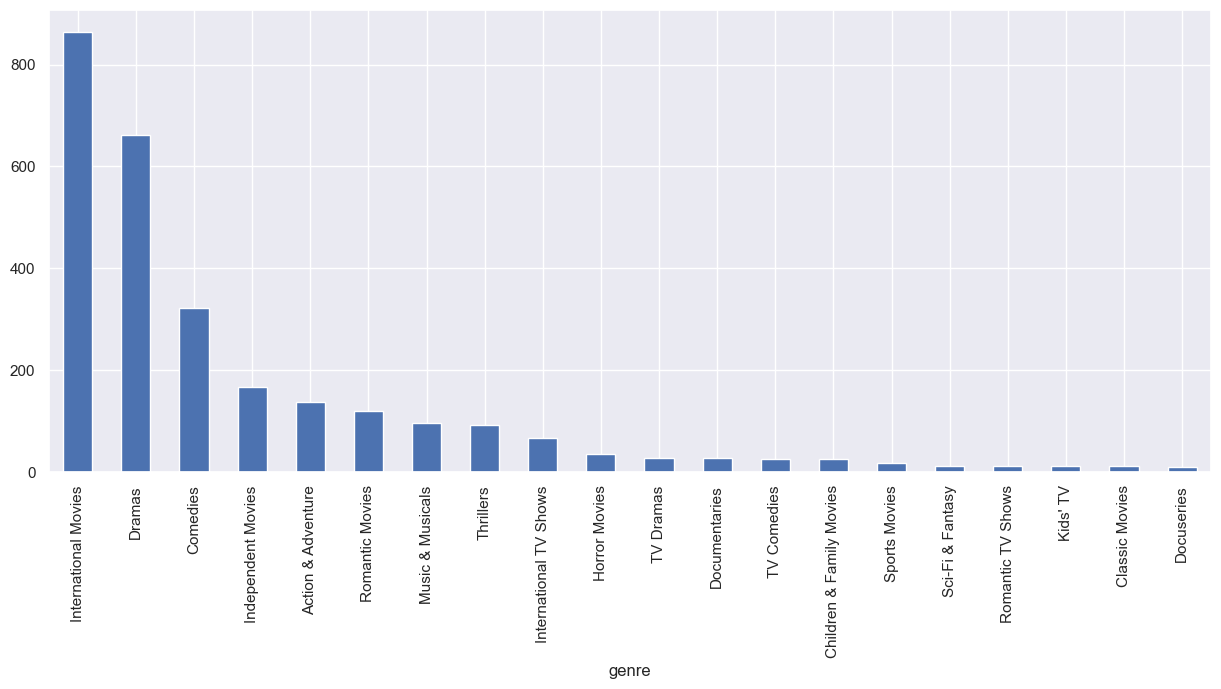

In [299]:
plt.figure(figsize=(15,6))
df[df["country"]=="India"].groupby("genre")["title"].nunique().sort_values(ascending=False).head(20).plot(kind="bar")

#### We can aslo see that the most preferred genre is in this order as shown above. International movies being the higest followed by dramas and Comedies

#### As most of the people in the sub continent also follow their international superstars or movies as it is liked by wider audience and has the best reach like marvels and avengers for example and obviously more people watch these

#### Top Actor Director Combination for movies

In [307]:
df[(df["cast"]!="No_Actor")&(df["director"]!="No_Director")&(df["type"]=="Movie")].groupby(["cast","director"])["title"].nunique().sort_values(ascending=False).head(10)

cast                director         
Rajesh Kava         Rajiv Chilaka        19
Julie Tejwani       Rajiv Chilaka        19
Jigna Bhardwaj      Rajiv Chilaka        18
Rupa Bhimani        Rajiv Chilaka        18
Vatsal Dubey        Rajiv Chilaka        16
Swapnil             Rajiv Chilaka        13
Mousam              Rajiv Chilaka        13
Saurav Chakraborty  Suhas Kadav           8
Kumiko Watanabe     Toshiya Shinohara     7
Sathyaraj           S.S. Rajamouli        7
Name: title, dtype: int64

#### Top Actor Director Combination for tv series

In [308]:
df[(df["cast"]!="No_Actor")&(df["director"]!="No_Director")&(df["type"]=="TV Show")].groupby(["cast","director"])["title"].nunique().sort_values(ascending=False).head(10)

cast                       director             
David Attenborough         Alastair Fothergill      3
Lee Il-hwa                 Shin Won-ho              2
Dave Chappelle             Stan Lathan              2
Gautham Vasudev Menon      Gautham Vasudev Menon    2
Prakash Raj                Gautham Vasudev Menon    2
Anjali                     Gautham Vasudev Menon    2
Sung Dong-il               Shin Won-ho              2
Nur Sürer                  Seren Yüce               1
Numthip Jongrachatawiboon  Sivaroj Kongsakul        1
Nunthapak Chalermpuwadej   Cheewatan Pusitsuksa     1
Name: title, dtype: int64

### 8. Recommendations - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand

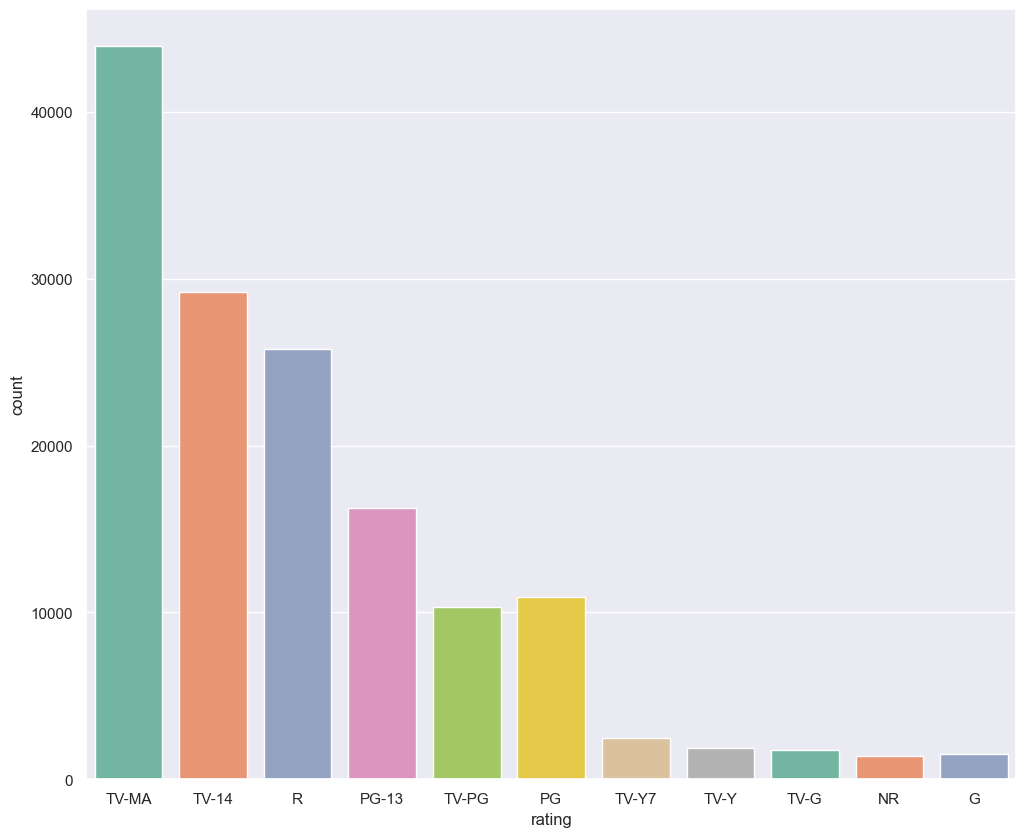

In [339]:
plt.figure(figsize=(12,10))
sns.set(style='darkgrid')
ax = sns.countplot(x='rating', data=df[df["type"]=="Movie"], palette='Set2', order=df['rating'].value_counts().index[0:11])

#### We can see that the top 4 movies ratings are (TV-MA, TV-14, R, PG-13) where in the meaning of these ratings simply mean that they are adult movies and requires parental guidance and might be because of either crimes, deaths, suicides or hot scenes. Also says a lot about the distribution of viewers or audience which is 18+

#### The Top 3 countries
 country
 {United States:     3689
 ,India:             1046,
 United Kingdom:     804}

#### So need to focus a lot more on these regions as we can expect a lot of viewers so that more revenue can be made

#### Top 3 Actors in series
cast
{Takahiro Sakurai:    25,
Yuki Kaji:           19,
Junichi Suwabe:      17}

#### Top 3 Actors in movies
cast
{Anupam Kher:         42
Shah Rukh Khan:      35
Naseeruddin Shah:    32}

#### Top 3 directors
director
{Rajiv Chilaka:    22,
Jan Suter:        21,
Raúl Campos:      19}

#### We can see the top actors and directors above and they have appeared more frequently than others and can be that their success rates are higher than others can also mean that a lot of people or audience know and understand the potential of these actors and directors and invest time and money watching them work on scree. So netflix should go for such movies which contain all top actors and directors as they would have a lot of fan following

<AxesSubplot:xlabel='genre'>

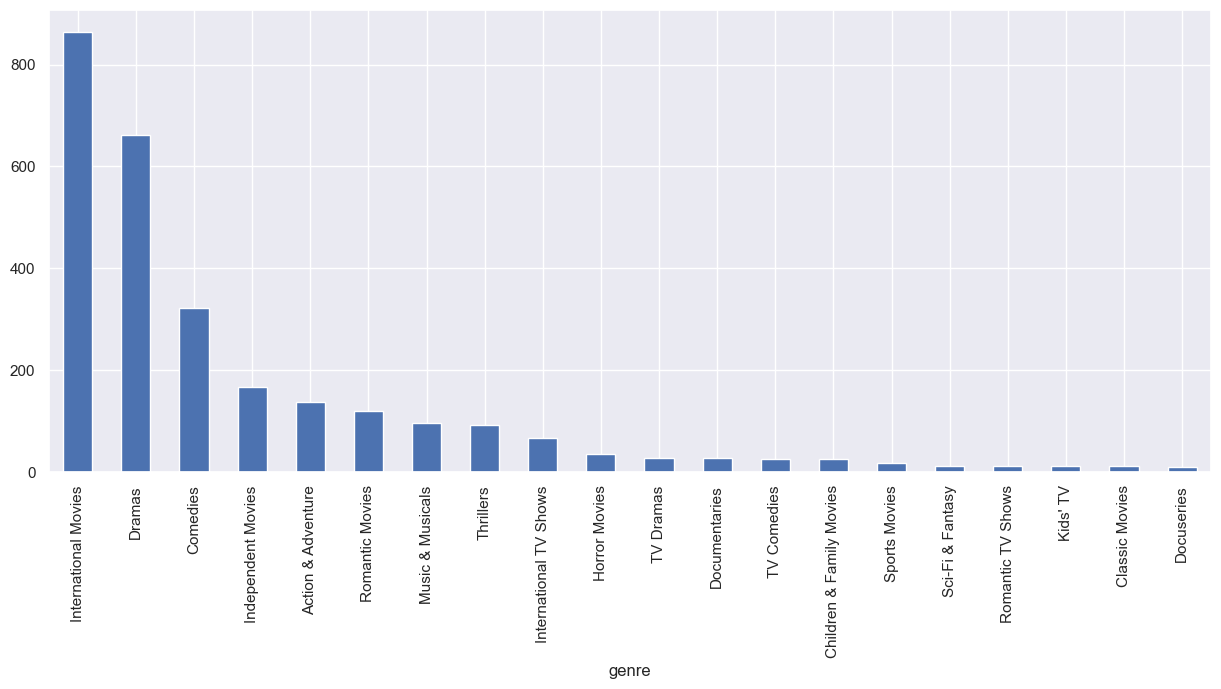

In [342]:
plt.figure(figsize=(15,6))
df[df["country"]=="India"].groupby("genre")["title"].nunique().sort_values(ascending=False).head(20).plot(kind="bar")

#### We can see here that the most preferred genres are international movies, dramas, comedies, independant and action. So netflix should work on more such movies in order to draw high revenue

Text(0.5, 1.0, 'Movies/ TV shows Added time')

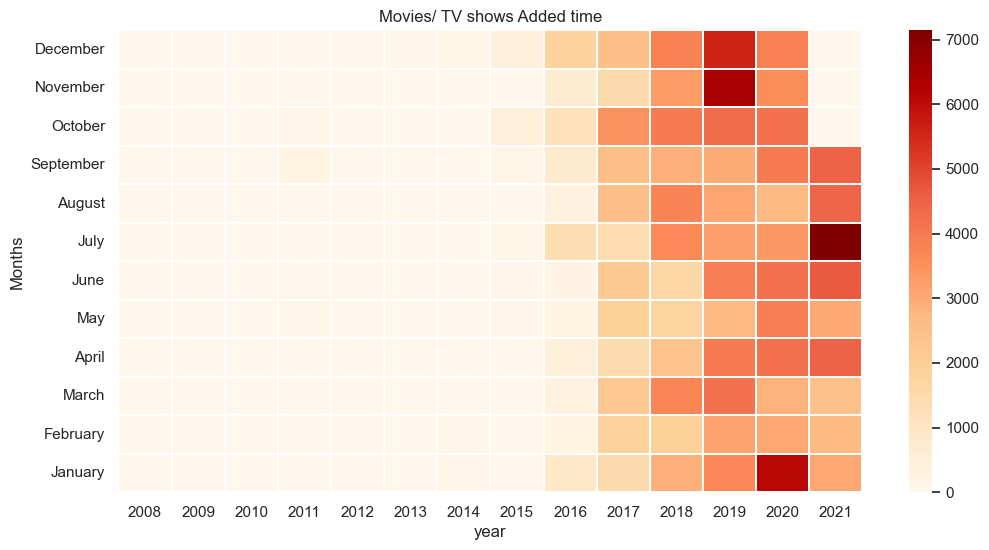

In [343]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]

df4 = df.groupby('year')['Months'].value_counts().unstack().fillna(0)[month_order].T

plt.figure(figsize=(12, 6))
sns.heatmap(df4,linewidths = 0.05, cmap="OrRd")
plt.title('Movies/ TV shows Added time')

#### It can be Observed that more number of shows are released after 2016 and also during the last 6 months or second half (JUL-DEC)

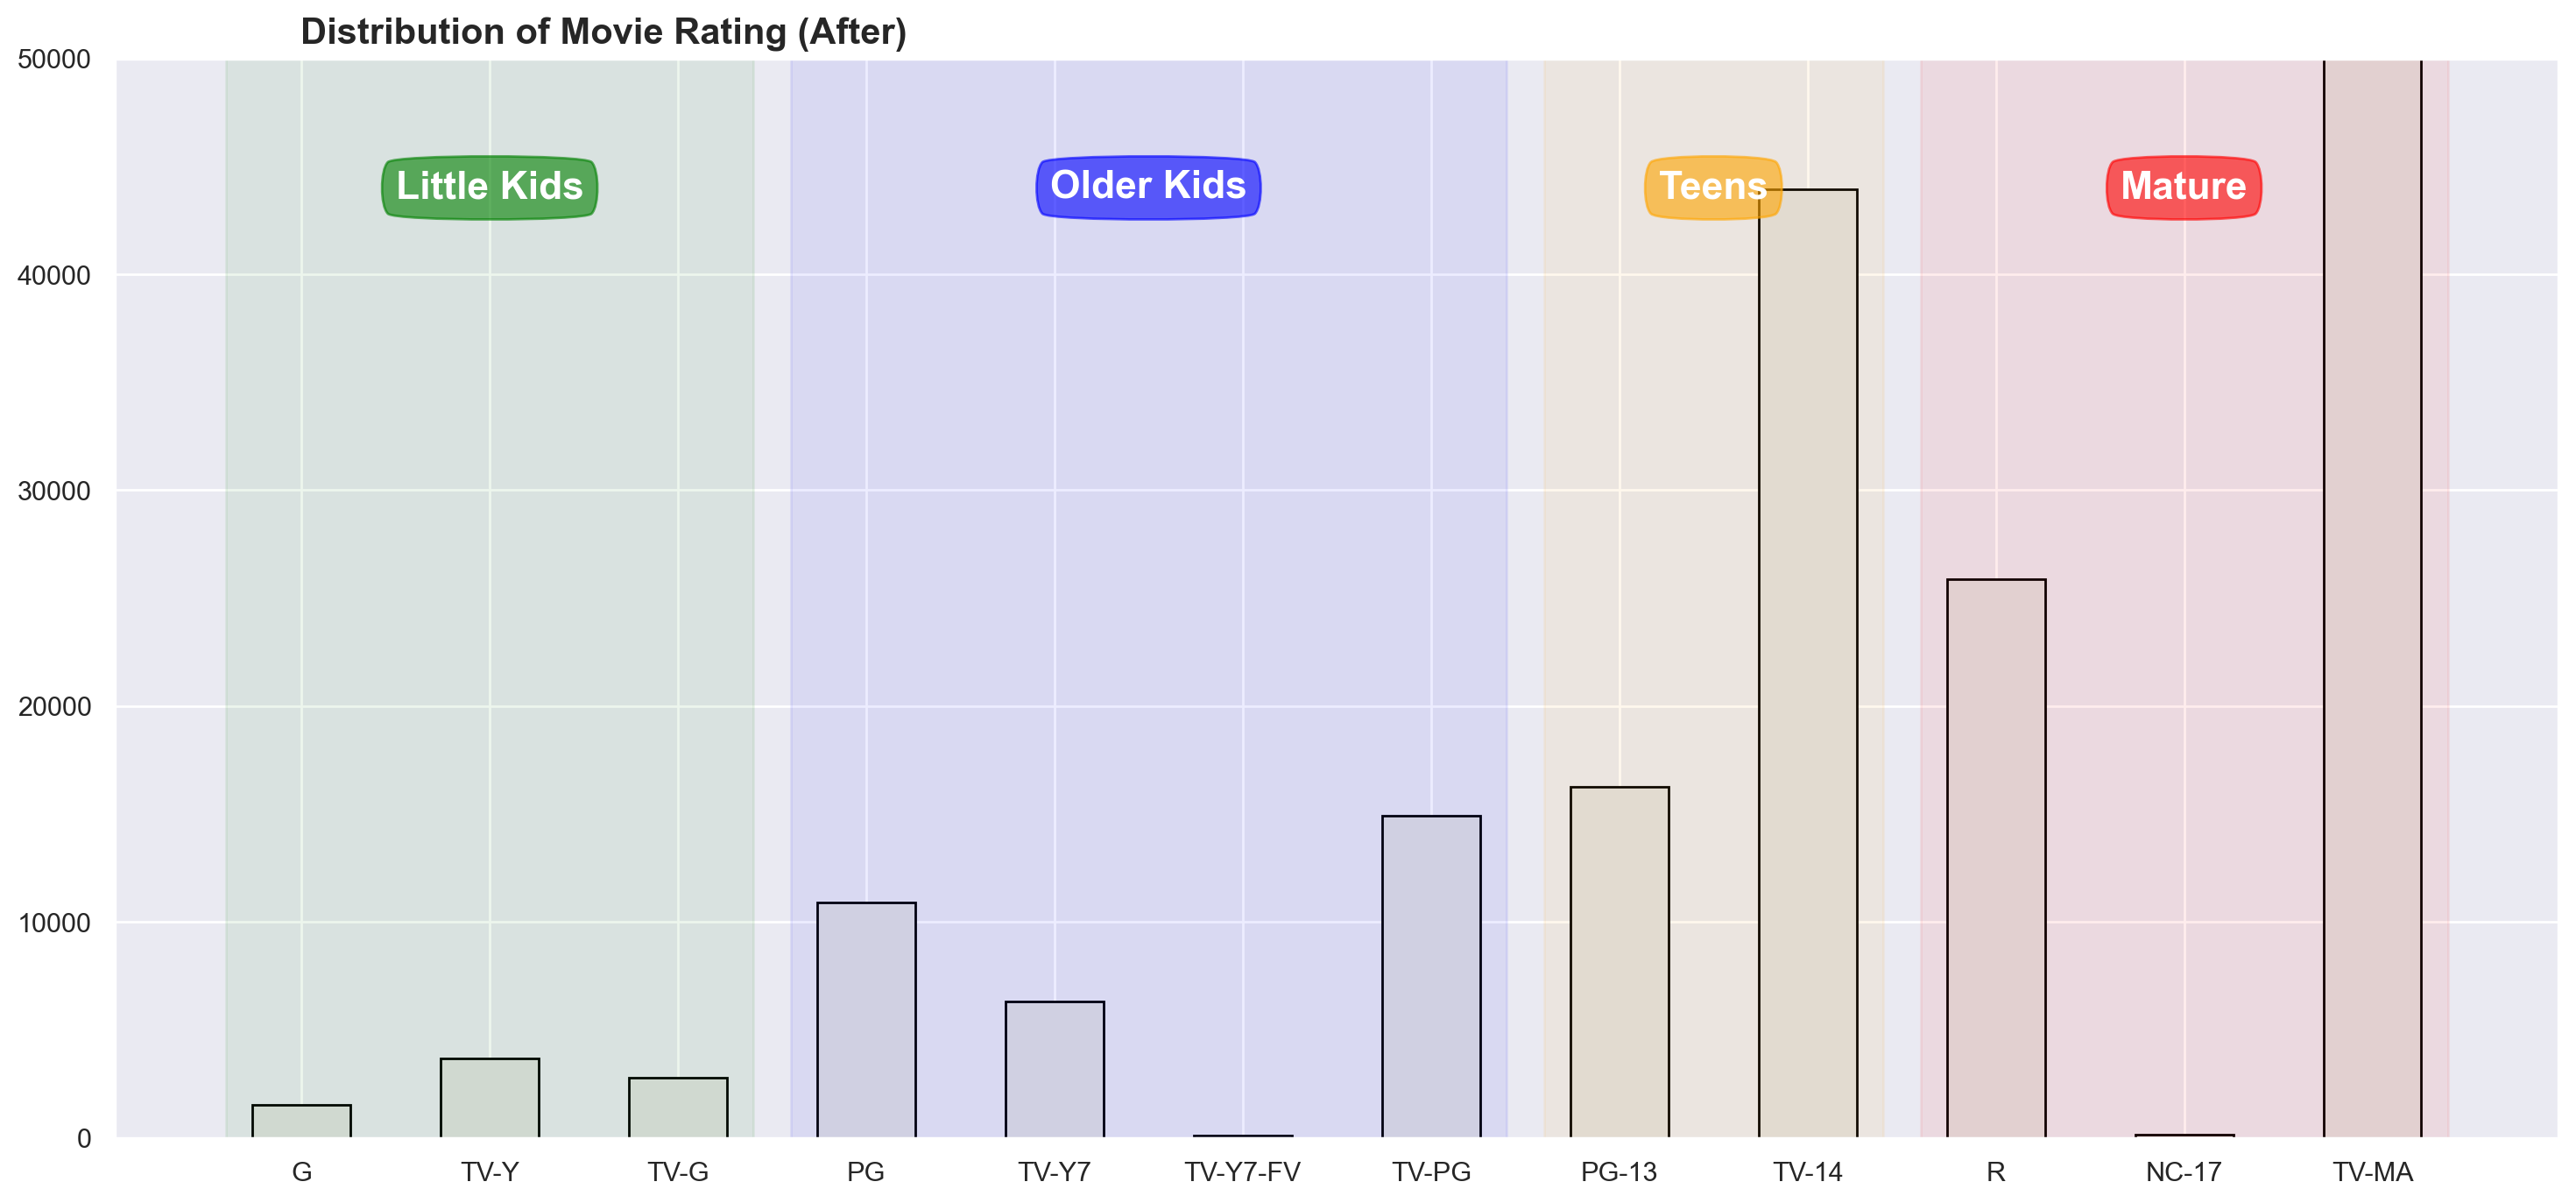

In [345]:
rating_barplot(movie_rating,'Movie', 44000, 50000)

#### To gain more revenue they should keep on with this strategy of releasing more movies or shows for teens and matures as most preferred movies or shows have ratings like (PG-13, TV-14, R, TV-MA)